# Machine Learning For Medical Diagnosis: Developing and comparing a heart attack prediction model 

## Author Information
### Author: Qiuming Xu
### Mail: Q.Xu19@newcastle.ac.uk

## Project Description
The aim of this project is to develop a Machine Learning-Based Heart Attack Diagnosis and Prediction model which is going to analyze and predict whether patients will have heart attack based on the selected set of risk factor datasets consisting of their characteristic information and pathological data. This project will evaluate and compare multiple machine learning models, and then select a model as a technique for the project.

## Data Dictionary

1.age - Age of the patient

2.sex - Sex of the patient
  0-female,1-male

3.cp - Chest pain type
  0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

4.trtbps - Resting blood pressure (in mm Hg)

5.chol - Cholestoral fetched via BMI sensor (in mg/dl)

6.fbs - if fasting blood sugar > 120 mg/dl 
  0 = False, 1 = True

7.restecg - Resting electrocardiographic results 
  0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

8.thalach - Maximum heart rate achieved

9.exng - Exercise induced angina 
  0 = No, 1 = Yes

10.oldpeak - Previous peak/ST depression induced by exercise relative to rest

11.slp - Slope/The slope of the peak exercise ST segment
  0 = Upsloping, 1 = Flat, 2 = Downsloping

12.ca - Number of major vessels/Number of major vessels (0-3) colored by flourosopy
  0, 1, 2, 3
 
13.thal - Thalassemia
  1 = normal, 2 = fixed defect, 3 = reversable defect

output - Target variable

## Global Imports

In [1]:
# global imports

# Import Python extension library (mathematical function library)
import numpy as np

# Import Python data analysis tools
import pandas as pd

# Import Python data visualization library
import seaborn as sns

# Import matplotlib-based plotting tools
import matplotlib.pyplot as plt

# Import warning filter
import warnings

# Set the warning state to 'ignore'
warnings.filterwarnings("ignore")

# Import Python data calculation tool
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

D:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read dataset

In [2]:
# read dataset

# Create a dataframe for the dataset and import the data
df_origin = pd.read_csv("../dataset/heartattack-dataset.csv")

# View the first five rows of the dataset
df_origin.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalach  exng  oldpeak  slp  ca  \
0   63    1   3     145   233    1        0      150     0      2.3    0   0   
1   37    1   2     130   250    0        1      187     0      3.5    0   0   
2   41    0   1     130   204    0        0      172     0      1.4    2   0   
3   56    1   1     120   236    0        1      178     0      0.8    2   0   
4   57    0   0     120   354    0        1      163     1      0.6    2   0   

   thal  output  
0     1       1  
1     2       1  
2     2       1  
3     2       1  
4     2       1

## EDA Report

In [3]:
# Import exploratory data analysis (EDA) tools

import pandas_profiling

# Generate EDA report
profile = pandas_profiling.ProfileReport(df_origin)

# View the EDA report
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### EDA report analysis
The main function of EDA report is to help developers quickly become familiar with the data set and determine that the dataset can be used for machine learning or deep learning development.  
EDA report can not only help developers quickly understand the basic information of each variable, such as missing values, repeated values, and the basic distribution of data, but also show the relationship between variables and the relationship between variables and target variable.  
Based on the information, developers can have a general understanding of unfamiliar data sets, and choose the most efficient data processing methods and learning modeling schemes.

## Information of the dataset
1. Basic Information
2. Null Value Count
3. Unique statistics

In [4]:
# View the basic information of the dataset (name, null value, number of rows, data type, etc.) 
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   trtbps   303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   thalach  303 non-null    int64  
 8   exng     303 non-null    int64  
 9   oldpeak  303 non-null    float64
 10  slp      303 non-null    int64  
 11  ca       303 non-null    int64  
 12  thal     303 non-null    int64  
 13  output   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Check if there are null values in the dataset
df_origin.isnull().sum()

age        0
sex        0
cp         0
trtbps     0
chol       0
fbs        0
restecg    0
thalach    0
exng       0
oldpeak    0
slp        0
ca         0
thal       0
output     0
dtype: int64

In [6]:
# View unique statistics for each feature

# Generate data list (empty)
data_dictionary_origin = {}

# Count the data and put the statistical results into the data list
for i in list(df_origin):
    data_dictionary_origin[i] = df_origin[i].value_counts().shape[0]

# Output statistics for each feature
pd.DataFrame(data_dictionary_origin, index = ["unique statistics"]).transpose()

unique statistics
age                     41
sex                      2
cp                       4
trtbps                  49
chol                   152
fbs                      2
restecg                  3
thalach                 91
exng                     2
oldpeak                 40
slp                      3
ca                       4
thal                     3
output                   2

## Feature Classification (Data Type)

In [7]:
# Classify features according to the type of data (continuous/Numerical or non-continuous/Categorical) Used to correct for nulls and outliers

# Features whose data type is non-continuous can complete the data according to the frequency of occurrence of the data (the most times)

#Features whose data type is continuous can complete the data according to methods such as median, average, etc.

categorical_cols = ['sex','cp','fbs','restecg','exng','slp','ca','thal']
numerical_cols = ["age","trtbps","chol","thalach","oldpeak"]
target_col = ["output"]
print("The categorial columns (discontinuous data) are : ", categorical_cols)
print("The numerical columns (continuous data) are  : ", numerical_cols)
print("The  target  variable  is  : ", target_col)

The categorial columns (discontinuous data) are :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'ca', 'thal']
The numerical columns (continuous data) are  :  ['age', 'trtbps', 'chol', 'thalach', 'oldpeak']
The  target  variable  is  :  ['output']


In [8]:
#View the categorical columns 
df_origin[categorical_cols].head(3)

sex  cp  fbs  restecg  exng  slp  ca  thal
0    1   3    1        0     0    0   0     1
1    1   2    0        1     0    0   0     2
2    0   1    0        0     0    2   0     2

In [9]:
#View the numerical columns 
df_origin[numerical_cols].head(3)

age  trtbps  chol  thalach  oldpeak
0   63     145   233      150      2.3
1   37     130   250      187      3.5
2   41     130   204      172      1.4

In [10]:
#View the target columns 
df_origin[target_col].head(3)

output
0       1
1       1
2       1

## Discontinuous data processing

In [11]:
# View unique statistics for categorical columns

# Generate data list (empty)
data_dictionary_categorical_cols = {}

# Count the data and put the statistical results into the data list
for i in list(df_origin[categorical_cols]):
    data_dictionary_categorical_cols[i] = df_origin[categorical_cols][i].value_counts().shape[0]

# Output statistics for categorical columns
pd.DataFrame(data_dictionary_categorical_cols, index = ["unique statistics of categorical columns"]).transpose()

unique statistics of categorical columns
sex                                             2
cp                                              4
fbs                                             2
restecg                                         3
exng                                            2
slp                                             3
ca                                              4
thal                                            3

In [12]:
#count the number of occurrences of each value in features whose data type is non-continuous/Categorical
#df[col_name].value_counts() is used to count the number of occurrences of each value in a feature

# Count the number of occurrences of each value in the feature "sex"
df_origin[categorical_cols].sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Count the number of occurrences of each value in the feature "cp"
df_origin[categorical_cols].cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [14]:
# Count the number of occurrences of each value in the feature "fbs"
df_origin[categorical_cols].fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [15]:
# Count the number of occurrences of each value in the feature "restecg"
df_origin[categorical_cols].restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [16]:
# Count the number of occurrences of each value in the feature "exng"
df_origin[categorical_cols].exng.value_counts()

0    204
1     99
Name: exng, dtype: int64

In [17]:
# Count the number of occurrences of each value in the feature "slp"
df_origin[categorical_cols].slp.value_counts()

2    142
1    140
0     21
Name: slp, dtype: int64

In [18]:
# Count the number of occurrences of each value in the feature "ca"
df_origin[categorical_cols].ca.value_counts()

0    175
1     65
2     38
3     25
Name: ca, dtype: int64

In [19]:
# Count the number of occurrences of each value in the feature "thal"
df_origin[categorical_cols].thal.value_counts()

2    166
3    117
1     20
Name: thal, dtype: int64

## Null Values processing (discontinuous data)
### If there are null values in discontinuous data,we can fill in the null values by calculating the mode of each feature value.

In [20]:
# Check if there are null values in the dataset
df_origin.isnull().sum()

age        0
sex        0
cp         0
trtbps     0
chol       0
fbs        0
restecg    0
thalach    0
exng       0
oldpeak    0
slp        0
ca         0
thal       0
output     0
dtype: int64

In [21]:
# Calculate the mode values (Data with the most occurrences) of features whose data type is discontinuous/Categorical

# Generate mode list (empty)
data_mode_categorical_cols = {}

# Calculate the mode and put the results into the mode list
for i in list(df_origin[categorical_cols]):
    
    data_mode_categorical_cols[i] = statistics.mode(df_origin[categorical_cols][i])

# Output mode for categorical columns
pd.DataFrame(data_mode_categorical_cols, index = ["mode values of categorical columns"]).transpose()

mode values of categorical columns
sex                                       1
cp                                        0
fbs                                       0
restecg                                   1
exng                                      0
slp                                       2
ca                                        0
thal                                      2

## Null Values processing (continuous data)
### If there are null values in continuous data,we can fill in the null values by calculating the median or mean of each feature value.

In [22]:
# Calculate the median values of features whose data type is continuous/Numerical

# Generate median list (empty)
data_median_numerical_cols = {}

# Calculate the mode and put the results into the mode list
for i in list(df_origin[numerical_cols]):
    
    data_median_numerical_cols[i] = statistics.median(df_origin[numerical_cols][i])

# Output mode for categorical columns
pd.DataFrame(data_median_numerical_cols, index = ["median values of numerical columns"]).transpose()

median values of numerical columns
age                                    55.0
trtbps                                130.0
chol                                  240.0
thalach                               153.0
oldpeak                                 0.8

In [23]:
# Calculate the mean values and other data of features whose data type is continuous/Numerical
# The transpose() function is used to transpose index and columns

df_origin[numerical_cols].describe().transpose()

count        mean        std    min    25%    50%    75%    max
age      303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
trtbps   303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol     303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
thalach  303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
oldpeak  303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2

In [24]:
# Check if the dataset still has an empty set after filling in the empty value
df_origin.isnull().sum()

age        0
sex        0
cp         0
trtbps     0
chol       0
fbs        0
restecg    0
thalach    0
exng       0
oldpeak    0
slp        0
ca         0
thal       0
output     0
dtype: int64

## Feature Analysis and Feature Selection

### Feature distribution chart

Text(0, 0.5, 'Density')

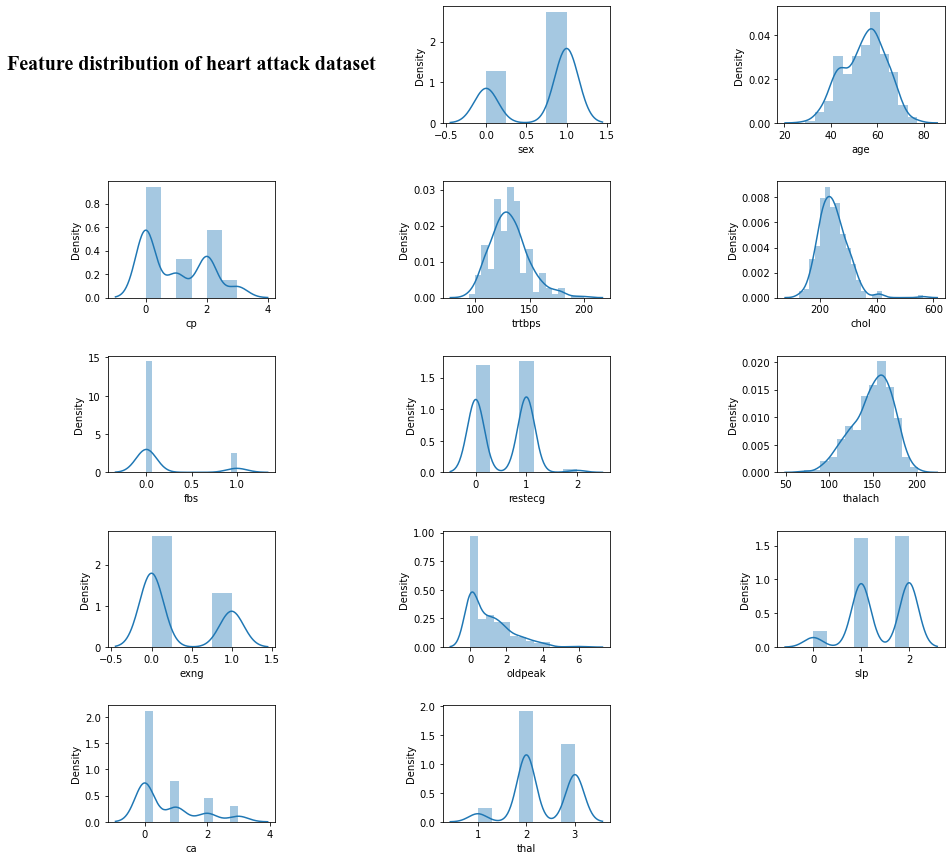

In [25]:
# Single variable distribution analysis (using figures)

# Set figure size
figure_single_feature = plt.figure(figsize=(15,15))

# Set figure spacing
figure_spacing = figure_single_feature.add_gridspec(5,3)

# Set figure position
figure_spacing.update(wspace=1, hspace=0.5)

# Set the position of each figure
ax0 = figure_single_feature.add_subplot(figure_spacing[0,0])
ax1 = figure_single_feature.add_subplot(figure_spacing[0,1])
ax2 = figure_single_feature.add_subplot(figure_spacing[0,2])
ax3 = figure_single_feature.add_subplot(figure_spacing[1,0])
ax4 = figure_single_feature.add_subplot(figure_spacing[1,1])
ax5 = figure_single_feature.add_subplot(figure_spacing[1,2])
ax6 = figure_single_feature.add_subplot(figure_spacing[2,0])
ax7 = figure_single_feature.add_subplot(figure_spacing[2,1])
ax8 = figure_single_feature.add_subplot(figure_spacing[2,2])
ax9 = figure_single_feature.add_subplot(figure_spacing[3,0])
ax10 = figure_single_feature.add_subplot(figure_spacing[3,1])
ax11 = figure_single_feature.add_subplot(figure_spacing[3,2])
ax12 = figure_single_feature.add_subplot(figure_spacing[4,0])
ax13 = figure_single_feature.add_subplot(figure_spacing[4,1])

# Set figure background color
background_color = "#FFFFFF"
figure_single_feature.patch.set_facecolor(background_color)


# Set background color of each figure
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)
ax12.set_facecolor(background_color)
ax13.set_facecolor(background_color)

# Hide figure Border
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)

# Hide figure Coordinate points
ax0.tick_params(left=False, bottom=False)

# Set the title of the plot
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(
    
    # Set spacing
    0.5,0.5,
    
    # Set title
    'Feature distribution of heart attack dataset',
    
    # Set horizontal center
    horizontalalignment='center',
    
    # Set vertical center
    verticalalignment='center',
    
    # Set font 
    fontsize=20,
    fontweight='bold',
      
    # Set font size
    fontfamily='Times New Roman',
      
    # set colour
    color="#000000")

# Sex count
# Set abscissa
sns.distplot(df_origin['sex'], hist=True, kde=True, ax=ax1)
ax1.set_xlabel("sex")
ax1.set_ylabel("Density")

# Sex count
# Set abscissa
sns.distplot(df_origin['age'], hist=True, kde=True, ax=ax2)
ax2.set_xlabel("age")
ax2.set_ylabel("Density")

# Sex count
# Set abscissa
sns.distplot(df_origin['cp'], hist=True, kde=True, ax=ax3)
ax3.set_xlabel("cp")
ax3.set_ylabel("Density")

# Sex count
# Set abscissa
sns.distplot(df_origin['trtbps'], hist=True, kde=True, ax=ax4)
ax4.set_xlabel("trtbps")
ax4.set_ylabel("Density")

# Sex count
# Set abscissa
sns.distplot(df_origin['chol'], hist=True, kde=True, ax=ax5)
ax5.set_xlabel("chol")
ax5.set_ylabel("Density")

# Sex count
# Set abscissa
sns.distplot(df_origin['fbs'], hist=True, kde=True, ax=ax6)
ax6.set_xlabel("fbs")
ax6.set_ylabel("Density")

# Sex count
# Set abscissa
sns.distplot(df_origin['restecg'], hist=True, kde=True, ax=ax7)
ax7.set_xlabel("restecg")
ax7.set_ylabel("Density")

# Sex count
# Set abscissa
sns.distplot(df_origin['thalach'], hist=True, kde=True, ax=ax8)
ax8.set_xlabel("thalach")
ax8.set_ylabel("Density")

# Sex count
# Set abscissa
sns.distplot(df_origin['exng'], hist=True, kde=True, ax=ax9)
ax9.set_xlabel("exng")
ax9.set_ylabel("Density")

# Sex count
# Set abscissa
sns.distplot(df_origin['oldpeak'], hist=True, kde=True, ax=ax10)
ax10.set_xlabel("oldpeak")
ax10.set_ylabel("Density")

# Sex count
# Set abscissa
sns.distplot(df_origin['slp'], hist=True, kde=True, ax=ax11)
ax11.set_xlabel("slp")
ax11.set_ylabel("Density")

# Sex count
# Set abscissa
sns.distplot(df_origin['ca'], hist=True, kde=True, ax=ax12)
ax12.set_xlabel("ca")
ax12.set_ylabel("Density")

# Sex count
# Set abscissa
sns.distplot(df_origin['thal'], hist=True, kde=True, ax=ax13)
ax13.set_xlabel("thal")
ax13.set_ylabel("Density")

### Single variable distribution analysis

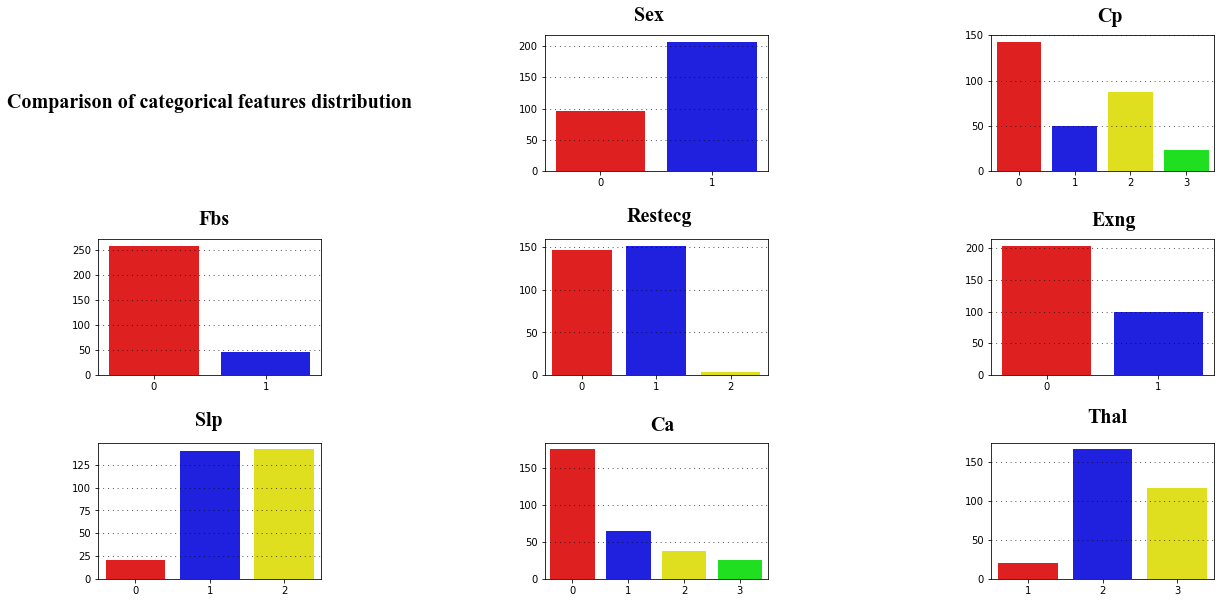

In [26]:
# Single variable distribution analysis (using figures)

# Set figure size
figure_single_feature = plt.figure(figsize=(20,10))

# Set figure spacing
figure_spacing = figure_single_feature.add_gridspec(3,3)

# Set figure position
figure_spacing.update(wspace=1, hspace=0.5)

# Set the position of each figure
ax0 = figure_single_feature.add_subplot(figure_spacing[0,0])
ax1 = figure_single_feature.add_subplot(figure_spacing[0,1])
ax2 = figure_single_feature.add_subplot(figure_spacing[0,2])
ax3 = figure_single_feature.add_subplot(figure_spacing[1,0])
ax4 = figure_single_feature.add_subplot(figure_spacing[1,1])
ax5 = figure_single_feature.add_subplot(figure_spacing[1,2])
ax6 = figure_single_feature.add_subplot(figure_spacing[2,0])
ax7 = figure_single_feature.add_subplot(figure_spacing[2,1])
ax8 = figure_single_feature.add_subplot(figure_spacing[2,2])

# Set figure background color
background_color = "#FFFFFF"
figure_single_feature.patch.set_facecolor(background_color)

# Set type of color palette (color of each bar)
color_palette = ["#FF0000","#0000FF","#FFFF00","#00FF00"]

# Set background color of each figure
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Hide figure Border
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)

# Hide figure Coordinate points
ax0.tick_params(left=False, bottom=False)

# Set the title of the plot
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(
    
    # Set spacing
    0.5,0.5,
    
    # Set title
    'Comparison of categorical features distribution',
    
    # Set horizontal center
    horizontalalignment='center',
    
    # Set vertical center
    verticalalignment='center',
    
    # Set font 
    fontsize=20,
    fontweight='bold',
      
    # Set font size
    fontfamily='Times New Roman',
      
    # set colour
    color="#000000")

# Sex count
# Set title
ax1.text(0.3, 240, 'Sex', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set abscissa
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set ordinate
sns.countplot(ax=ax1, data=df_origin, x='sex', palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Cp count
# Set title
ax2.text(1.4, 165, 'Cp', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set abscissa
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set ordinate
sns.countplot(ax=ax2, data=df_origin, x='cp', palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Fbs count
# Set title
ax3.text(0.4, 300, 'Fbs', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set abscissa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set ordinate
sns.countplot(ax=ax3, data=df_origin, x='fbs', palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Restecg count
# Set title
ax4.text(0.6, 180, 'Restecg', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set abscissa
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set ordinate
sns.countplot(ax=ax4, data=df_origin, x='restecg', palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Exng count
# Set title
ax5.text(0.4, 235, 'Exng', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set abscissa
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set ordinate
sns.countplot(ax=ax5, data=df_origin, x='exng', palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Slp count
# Set title
ax6.text(0.8, 168, 'Slp', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set abscissa
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set ordinate
sns.countplot(ax=ax6, data=df_origin, x='slp', palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")

# Ca count
# Set title
ax7.text(1.4, 200, 'Ca', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set abscissa
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set ordinate
sns.countplot(ax=ax7, data=df_origin, x='ca', palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thal count
# Set title
ax8.text(0.8, 200, 'Thal', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set abscissa
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set ordinate
sns.countplot(ax=ax8, data=df_origin, x='thal', palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

# Set the single figure border
for i in ["top","right","left"]:
    ax1.spines[i].set_visible(True)
    ax2.spines[i].set_visible(True)
    ax3.spines[i].set_visible(True)
    ax4.spines[i].set_visible(True)
    ax5.spines[i].set_visible(True)
    ax6.spines[i].set_visible(True)
    ax7.spines[i].set_visible(True)
    ax8.spines[i].set_visible(True)

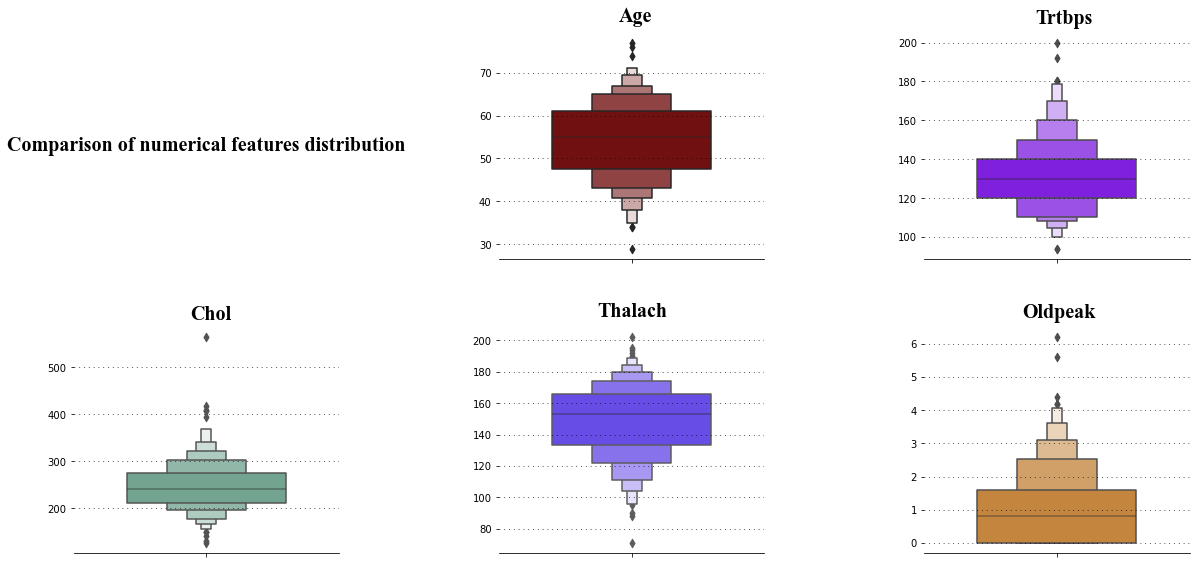

In [27]:
# Statistics dispersion (using boxen plots)

# Set figure size
figure_single_feature = plt.figure(figsize=(20,15))

# Set figure spacing
figure_spacing = figure_single_feature.add_gridspec(3,3)

# Set figure position
figure_spacing.update(wspace=0.6, hspace=0.3)

# Set the position of each figure
ax0 = figure_single_feature.add_subplot(figure_spacing[0,0])
ax1 = figure_single_feature.add_subplot(figure_spacing[0,1])
ax2 = figure_single_feature.add_subplot(figure_spacing[0,2])
ax3 = figure_single_feature.add_subplot(figure_spacing[1,0])
ax4 = figure_single_feature.add_subplot(figure_spacing[1,1])
ax5 = figure_single_feature.add_subplot(figure_spacing[1,2])

# Set figure background color
background_color = "#FFFFFF"
figure_single_feature.patch.set_facecolor(background_color)

# Set background color of each figure
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Hide figure Border
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)

# Hide figure Coordinate points
ax0.tick_params(left=False, bottom=False)

# Set the title of the plot
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(
    
    # Set spacing
    0.5,0.5,
    
    # Set title
    'Comparison of numerical features distribution',
    
    # Set horizontal center
    horizontalalignment='center',
    
    # Set vertical center
    verticalalignment='center',
    
    # Set font 
    fontsize=20, 
    fontweight='bold',
      
    # Set font size
    fontfamily='Times New Roman',
      
    # set colour
    color="#000000")

# Age 
# Set title
ax1.text(-0.05, 82, 'Age', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set ordinate
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df_origin['age'],palette=["#800000"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Trtbps 
# Set title
ax2.text(-0.08, 210, 'Trtbps', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set ordinate
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df_origin['trtbps'],palette=["#8000ff"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# Chol 
# Set title
ax3.text(-0.06, 602, 'Chol', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set ordinate
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df_origin['chol'],palette=["#6aac90"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Thalachh 
# Set title
ax4.text(-0.13, 215, 'Thalach', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set ordinate
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df_origin['thalach'],palette=["#5833ff"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# oldpeak 
# Set title
ax5.text(-0.13, 6.8, 'Oldpeak', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set ordinate
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df_origin['oldpeak'],palette=["#da8829"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Set the single figure border
for i in ["top","right","left"]:
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)

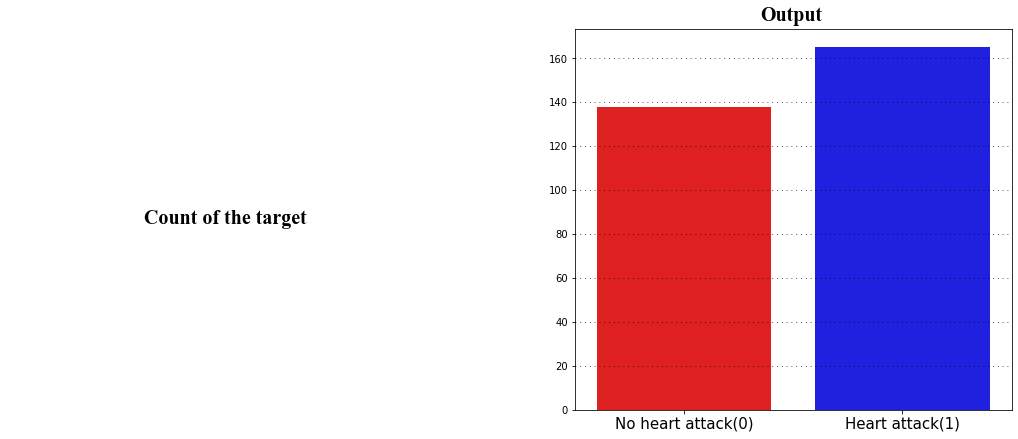

In [28]:
# Analyze results (using graphs)

# Set figure size
figure_output = plt.figure(figsize=(18,7))

# Set figure spacing
gs = figure_output.add_gridspec(1,2)

# Set figure position
gs.update(wspace=0.3, hspace=0.15)

# Set the position of each figure
ax0 = figure_output.add_subplot(gs[0,0])
ax1 = figure_output.add_subplot(gs[0,1])

# Set figure background color
background_color = "#ffffff"

# Set type of color palette (color of each bar)
color_palette = ["#FF0000","#0000FF"]
figure_output.patch.set_facecolor(background_color) 


# Set background color of each figure
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Hide figure Border
ax0.spines["top"].set_visible(False )
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False )
ax0.spines["right"].set_visible(False )

# Hide figure Coordinate points
ax0.tick_params(left=False, bottom=False)

# Set the title of the plot
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(
    
    # Set spacing
    0.5,0.5,
    
    # Set title
    'Count of the target',
    
    # Set horizontal center
    horizontalalignment='center',
    
    # Set vertical center
    verticalalignment='center',
    
    # Set font 
    fontsize=20, 
    fontweight='bold',
      
    # Set font size
    fontfamily='Times New Roman',
      
    # set colour
    color="#000000")

# Target Count
# Set title
ax1.text(0.35,177,"Output",fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")

# Set abscissa
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

# Set ordinate
sns.countplot(ax=ax1, data=df_origin, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Set the horizontal axis title
ax1.set_xticklabels(["No heart attack(0)","Heart attack(1)"], fontsize=15)

# Set the single figure border
ax1.spines["top"].set_visible(True)
ax1.spines["left"].set_visible(True)
ax1.spines["right"].set_visible(True)

## Feature contribution(categorical columns/discontinuous data)
### 1. Bar Count Chart
### 2. Kernel Density Estimation Chart

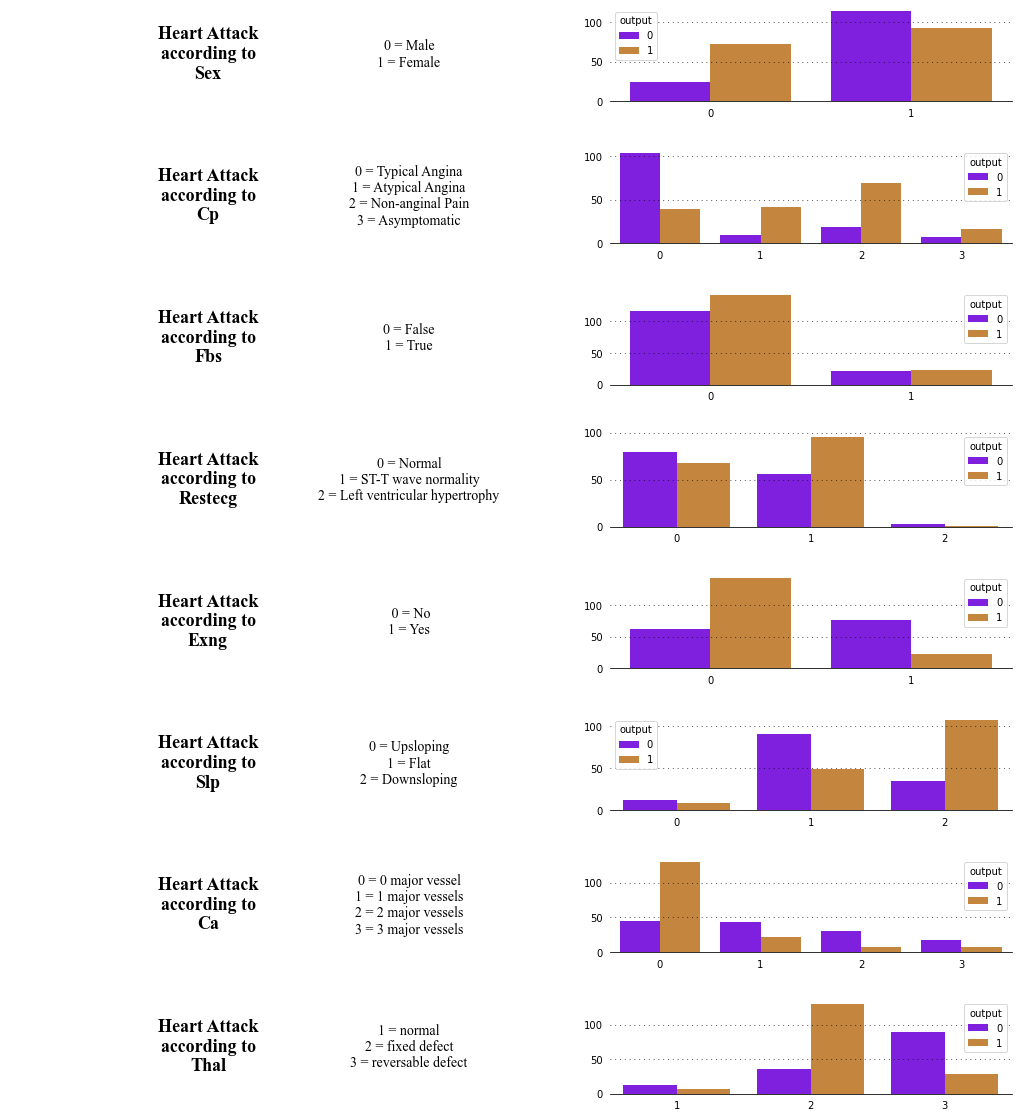

In [29]:
# By displaying the relationship between a feature (or a combination of two features) and output in a graph, 
# the impact of the feature (or a combination of two features) on the output is more intuitively reflected

# Set figure size
figure_feature_contribution = plt.figure(figsize=(18,20))

# Set figure spacing
figure_spacing = figure_feature_contribution.add_gridspec(8,2)

# Set figure position
figure_spacing.update(wspace=0.5, hspace=0.5)

# Set the position of each figure
ax0 = figure_feature_contribution.add_subplot(figure_spacing[0,0])
ax1 = figure_feature_contribution.add_subplot(figure_spacing[0,1])
ax2 = figure_feature_contribution.add_subplot(figure_spacing[1,0])
ax3 = figure_feature_contribution.add_subplot(figure_spacing[1,1])
ax4 = figure_feature_contribution.add_subplot(figure_spacing[2,0])
ax5 = figure_feature_contribution.add_subplot(figure_spacing[2,1])
ax6 = figure_feature_contribution.add_subplot(figure_spacing[3,0])
ax7 = figure_feature_contribution.add_subplot(figure_spacing[3,1])
ax8 = figure_feature_contribution.add_subplot(figure_spacing[4,0])
ax9 = figure_feature_contribution.add_subplot(figure_spacing[4,1])
ax10 = figure_feature_contribution.add_subplot(figure_spacing[5,0])
ax11 = figure_feature_contribution.add_subplot(figure_spacing[5,1])
ax12 = figure_feature_contribution.add_subplot(figure_spacing[6,0])
ax13 = figure_feature_contribution.add_subplot(figure_spacing[6,1])
ax14 = figure_feature_contribution.add_subplot(figure_spacing[7,0])
ax15 = figure_feature_contribution.add_subplot(figure_spacing[7,1])

# Set figure background color
background_color = "#FFFFFF"
figure_feature_contribution.patch.set_facecolor(background_color)

# Set type of color palette (color of each bar)
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# Set background color of each figure
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color) 
ax11.set_facecolor(background_color) 
ax12.set_facecolor(background_color)
ax13.set_facecolor(background_color)
ax14.set_facecolor(background_color)
ax15.set_facecolor(background_color)


# Hide figure Coordinate points
ax0.tick_params(left=False, bottom=False)
ax2.tick_params(left=False, bottom=False)
ax4.tick_params(left=False, bottom=False)
ax6.tick_params(left=False, bottom=False)
ax8.tick_params(left=False, bottom=False)
ax10.tick_params(left=False, bottom=False)
ax12.tick_params(left=False, bottom=False)
ax14.tick_params(left=False, bottom=False)

# Sex
# 0 = Male, 1 = Female
# Sex title
ax0.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nSex",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Sex data dictionary text
ax0.text(
    # Set spacing
    1,.5,
    # Set text
    "0 = Male\n1 = Female",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
# Hide figure Coordinate points
ax1.tick_params(left=False, bottom=False)
# Set ordinate
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax1,data=df_origin,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax1.set_xlabel("")
ax1.set_ylabel("")

# Cp
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
# Cp title
ax2.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nCp",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Cp data dictionary text
ax2.text(
    # Set spacing
    1,.5,
    # Set text
    "0 = Typical Angina\n1 = Atypical Angina\n2 = Non-anginal Pain\n3 = Asymptomatic",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
# Hide figure Coordinate points
ax3.tick_params(left=False, bottom=False)
# Set ordinate
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax3,data=df_origin,x='cp',palette=["#8000ff","#da8829"], hue='output')
ax3.set_xlabel("")
ax3.set_ylabel("")

# Fbs
# 0 = False, 1 = True
# Fbs title
ax4.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nFbs",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Fbs data dictionary text
ax4.text(
    # Set spacing
    1,.5,
    # Set text
    "0 = False\n1 = True",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
# Hide figure Coordinate points
ax5.tick_params(left=False, bottom=False)
# Set ordinate
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax5,data=df_origin,x='fbs',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg
# 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
# Restecg title
ax6.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nRestecg",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Restecg data dictionary text
ax6.text(
    # Set spacing
    1,.5,
    # Set text
    "0 = Normal\n1 = ST-T wave normality\n2 = Left ventricular hypertrophy",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
# Hide figure Coordinate points
ax7.tick_params(left=False, bottom=False)
# Set ordinate
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax7,data=df_origin,x='restecg',palette=["#8000ff","#da8829"], hue='output')
ax7.set_xlabel("")
ax7.set_ylabel("")

# Exng
# 0 = No, 1 = Yes
# Exng title
ax8.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nExng",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Exng data dictionary text
ax8.text(
    # Set spacing
    1,.5,
    # Set text
    " 0 = No\n1 = Yes",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
# Hide figure Coordinate points
ax9.tick_params(left=False, bottom=False)
# Set ordinate
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax9,data=df_origin,x='exng',palette=["#8000ff","#da8829"], hue='output')
ax9.set_xlabel("")
ax9.set_ylabel("")

# Slp
# 0 = Upsloping, 1 = Flat, 2 = Downsloping
# Slp title
ax10.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nSlp",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Slp data dictionary text
ax10.text(
    # Set spacing
    1,.5,
    # Set text
    "0 = Upsloping\n1 = Flat\n2 = Downsloping",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
# Hide figure Coordinate points
ax11.tick_params(left=False, bottom=False)
# Set ordinate
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax11,data=df_origin,x='slp',palette=["#8000ff","#da8829"], hue='output')
ax11.set_xlabel("")
ax11.set_ylabel("")

# Ca
# 0 = 0 major vessel, 1 = 1 major vessels, 2 = 2 major vessels, 3 = 3 major vessels
# Ca title
ax12.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nCa",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Ca data dictionary text
ax12.text(
    # Set spacing
    1,.5,
    # Set text
    "0 = 0 major vessel\n1 = 1 major vessels\n2 = 2 major vessels\n3 = 3 major vessels",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax12.spines["bottom"].set_visible(False)
ax12.set_xticklabels([])
ax12.set_yticklabels([])
# Hide figure Coordinate points
ax13.tick_params(left=False, bottom=False)
# Set ordinate
ax13.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax13,data=df_origin,x='ca',palette=["#8000ff","#da8829"], hue='output')
ax13.set_xlabel("")
ax13.set_ylabel("")

# Thal
# 1 = normal, 2 = fixed defect, 3 = reversable defect
# Thal title
ax14.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nThal",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Thal data dictionary text
ax14.text(
    # Set spacing
    1,.5,
    # Set text
    "1 = normal\n2 = fixed defect\n3 = reversable defect",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax14.spines["bottom"].set_visible(False)
ax14.set_xticklabels([])
ax14.set_yticklabels([])
# Hide figure Coordinate points
ax15.tick_params(left=False, bottom=False)
# Set ordinate
ax15.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax15,data=df_origin,x='thal',palette=["#8000ff","#da8829"], hue='output')
ax15.set_xlabel("")
ax15.set_ylabel("")

# Set the single figure border
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)
    ax12.spines[i].set_visible(False)
    ax13.spines[i].set_visible(False)
    ax14.spines[i].set_visible(False)
    ax15.spines[i].set_visible(False)

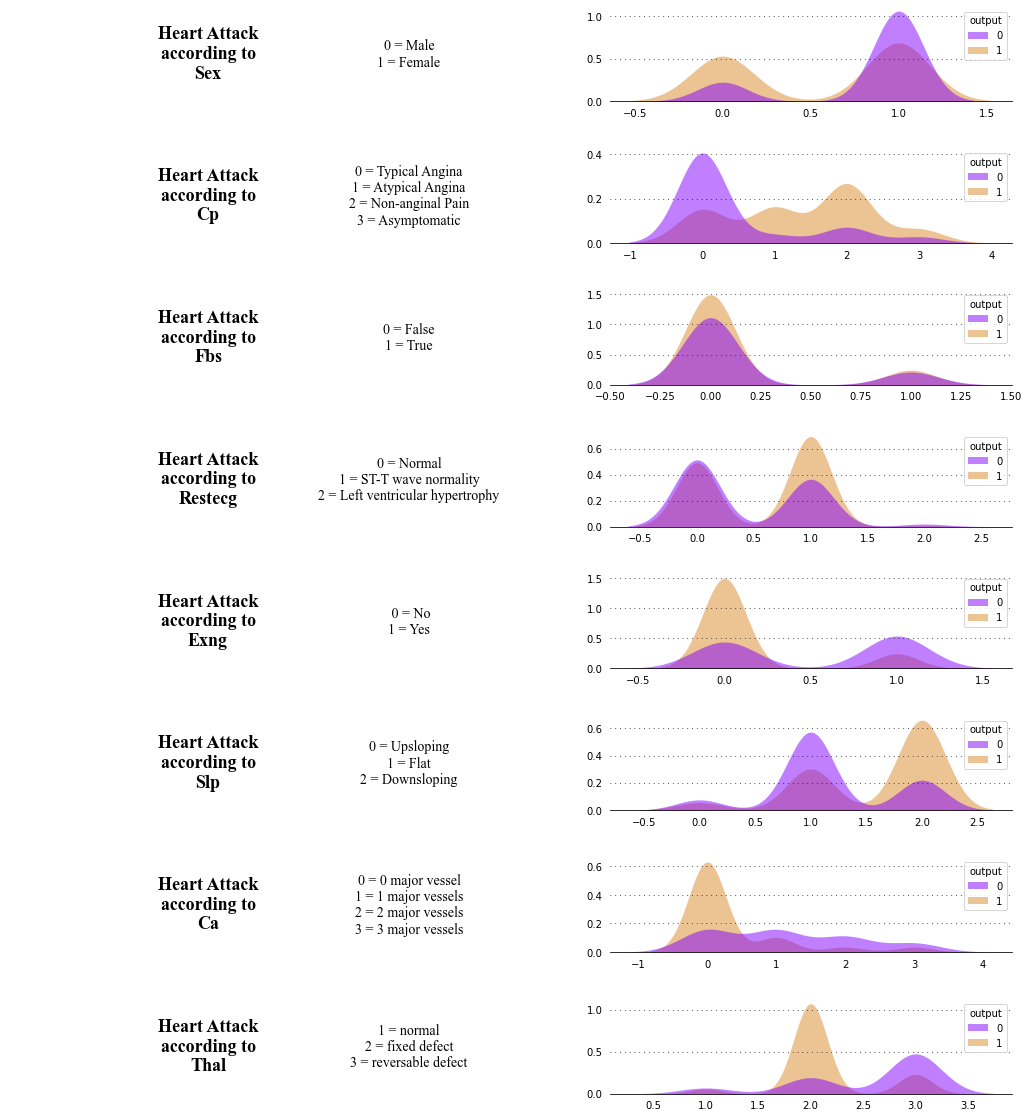

In [30]:
# By displaying the relationship between a feature (or a combination of two features) and output in a graph, 
# the impact of the feature (or a combination of two features) on the output is more intuitively reflected

# Set figure size
figure_feature_contribution = plt.figure(figsize=(18,20))

# Set figure spacing
figure_spacing = figure_feature_contribution.add_gridspec(8,2)

# Set figure position
figure_spacing.update(wspace=0.5, hspace=0.5)

# Set the position of each figure
ax0 = figure_feature_contribution.add_subplot(figure_spacing[0,0])
ax1 = figure_feature_contribution.add_subplot(figure_spacing[0,1])
ax2 = figure_feature_contribution.add_subplot(figure_spacing[1,0])
ax3 = figure_feature_contribution.add_subplot(figure_spacing[1,1])
ax4 = figure_feature_contribution.add_subplot(figure_spacing[2,0])
ax5 = figure_feature_contribution.add_subplot(figure_spacing[2,1])
ax6 = figure_feature_contribution.add_subplot(figure_spacing[3,0])
ax7 = figure_feature_contribution.add_subplot(figure_spacing[3,1])
ax8 = figure_feature_contribution.add_subplot(figure_spacing[4,0])
ax9 = figure_feature_contribution.add_subplot(figure_spacing[4,1])
ax10 = figure_feature_contribution.add_subplot(figure_spacing[5,0])
ax11 = figure_feature_contribution.add_subplot(figure_spacing[5,1])
ax12 = figure_feature_contribution.add_subplot(figure_spacing[6,0])
ax13 = figure_feature_contribution.add_subplot(figure_spacing[6,1])
ax14 = figure_feature_contribution.add_subplot(figure_spacing[7,0])
ax15 = figure_feature_contribution.add_subplot(figure_spacing[7,1])

# Set figure background color
background_color = "#FFFFFF"
figure_feature_contribution.patch.set_facecolor(background_color)

# Set type of color palette (color of each bar)
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]

# Set background color of each figure
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color) 
ax11.set_facecolor(background_color) 
ax12.set_facecolor(background_color)
ax13.set_facecolor(background_color)
ax14.set_facecolor(background_color)
ax15.set_facecolor(background_color)


# Hide figure Coordinate points
ax0.tick_params(left=False, bottom=False)
ax2.tick_params(left=False, bottom=False)
ax4.tick_params(left=False, bottom=False)
ax6.tick_params(left=False, bottom=False)
ax8.tick_params(left=False, bottom=False)
ax10.tick_params(left=False, bottom=False)
ax12.tick_params(left=False, bottom=False)
ax14.tick_params(left=False, bottom=False)

# Sex
# 0 = Male, 1 = Female
# Sex title
ax0.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nSex",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Sex data dictionary text
ax0.text(
    # Set spacing
    1,.5,
    # Set text
    "0 = Male\n1 = Female",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
# Hide figure Coordinate points
ax1.tick_params(left=False, bottom=False)
# Set ordinate
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
#sns.countplot(ax=ax1,data=df_origin,x='sex',palette=["#8000ff","#da8829"], hue='output')
sns.kdeplot(ax=ax1, data=df_origin, x='sex',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Cp
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
# Cp title
ax2.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nCp",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Cp data dictionary text
ax2.text(
    # Set spacing
    1,.5,
    # Set text
    "0 = Typical Angina\n1 = Atypical Angina\n2 = Non-anginal Pain\n3 = Asymptomatic",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
# Hide figure Coordinate points
ax3.tick_params(left=False, bottom=False)
# Set ordinate
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
#sns.countplot(ax=ax3,data=df_origin,x='cp',palette=["#8000ff","#da8829"], hue='output')
sns.kdeplot(ax=ax3, data=df_origin, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")


# Fbs
# 0 = False, 1 = True
# Fbs title
ax4.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nFbs",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Fbs data dictionary text
ax4.text(
    # Set spacing
    1,.5,
    # Set text
    "0 = False\n1 = True",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
# Hide figure Coordinate points
ax5.tick_params(left=False, bottom=False)
# Set ordinate
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
#sns.countplot(ax=ax5,data=df_origin,x='fbs',palette=["#8000ff","#da8829"], hue='output')
sns.kdeplot(ax=ax5, data=df_origin, x='fbs',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg
# 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
# Restecg title
ax6.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nRestecg",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Restecg data dictionary text
ax6.text(
    # Set spacing
    1,.5,
    # Set text
    "0 = Normal\n1 = ST-T wave normality\n2 = Left ventricular hypertrophy",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
# Hide figure Coordinate points
ax7.tick_params(left=False, bottom=False)
# Set ordinate
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
#sns.countplot(ax=ax7,data=df_origin,x='restecg',palette=["#8000ff","#da8829"], hue='output')
sns.kdeplot(ax=ax7, data=df_origin, x='restecg',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Exng
# 0 = No, 1 = Yes
# Exng title
ax8.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nExng",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Exng data dictionary text
ax8.text(
    # Set spacing
    1,.5,
    # Set text
    " 0 = No\n1 = Yes",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
# Hide figure Coordinate points
ax9.tick_params(left=False, bottom=False)
# Set ordinate
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
#sns.countplot(ax=ax9,data=df_origin,x='exng',palette=["#8000ff","#da8829"], hue='output')
sns.kdeplot(ax=ax9, data=df_origin, x='exng',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

# Slp
# 0 = Upsloping, 1 = Flat, 2 = Downsloping
# Slp title
ax10.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nSlp",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Slp data dictionary text
ax10.text(
    # Set spacing
    1,.5,
    # Set text
    "0 = Upsloping\n1 = Flat\n2 = Downsloping",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
# Hide figure Coordinate points
ax11.tick_params(left=False, bottom=False)
# Set ordinate
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
#sns.countplot(ax=ax11,data=df_origin,x='slp',palette=["#8000ff","#da8829"], hue='output')
sns.kdeplot(ax=ax11, data=df_origin, x='slp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax11.set_xlabel("")
ax11.set_ylabel("")

# Ca
# 0 = 0 major vessel, 1 = 1 major vessels, 2 = 2 major vessels, 3 = 3 major vessels
# Ca title
ax12.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nCa",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Ca data dictionary text
ax12.text(
    # Set spacing
    1,.5,
    # Set text
    "0 = 0 major vessel\n1 = 1 major vessels\n2 = 2 major vessels\n3 = 3 major vessels",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax12.spines["bottom"].set_visible(False)
ax12.set_xticklabels([])
ax12.set_yticklabels([])
# Hide figure Coordinate points
ax13.tick_params(left=False, bottom=False)
# Set ordinate
ax13.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
#sns.countplot(ax=ax13,data=df_origin,x='ca',palette=["#8000ff","#da8829"], hue='output')
sns.kdeplot(ax=ax13, data=df_origin, x='ca',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax13.set_xlabel("")
ax13.set_ylabel("")

# Thal
# 1 = normal, 2 = fixed defect, 3 = reversable defect
# Thal title
ax14.text(   
    # Set spacing
    0.5,0.5,
    # Set title
    "Heart Attack\naccording to\nThal",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set vertical center
    verticalalignment = 'center',
     # Set font 
    fontsize = 18,
    fontweight='bold',
    # Set font size
    fontfamily='Times New Roman',
    # set colour
    color='#000000')
# Thal data dictionary text
ax14.text(
    # Set spacing
    1,.5,
    # Set text
    "1 = normal\n2 = fixed defect\n3 = reversable defect",
    # Set horizontal center
    horizontalalignment = 'center',
    # Set horizontal center
    verticalalignment = 'center',
    # Set font 
    fontsize = 14,
    # Set font size
    fontfamily='Times New Roman')
# Hide figure Border
ax14.spines["bottom"].set_visible(False)
ax14.set_xticklabels([])
ax14.set_yticklabels([])
# Hide figure Coordinate points
ax15.tick_params(left=False, bottom=False)
# Set ordinate
ax15.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
#sns.countplot(ax=ax15,data=df_origin,x='thal',palette=["#8000ff","#da8829"], hue='output')
sns.kdeplot(ax=ax15, data=df_origin, x='thal',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax15.set_xlabel("")
ax15.set_ylabel("")

# Set the single figure border
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)
    ax12.spines[i].set_visible(False)
    ax13.spines[i].set_visible(False)
    ax14.spines[i].set_visible(False)
    ax15.spines[i].set_visible(False)

## Feature contribution(numerical columns/continuous data)

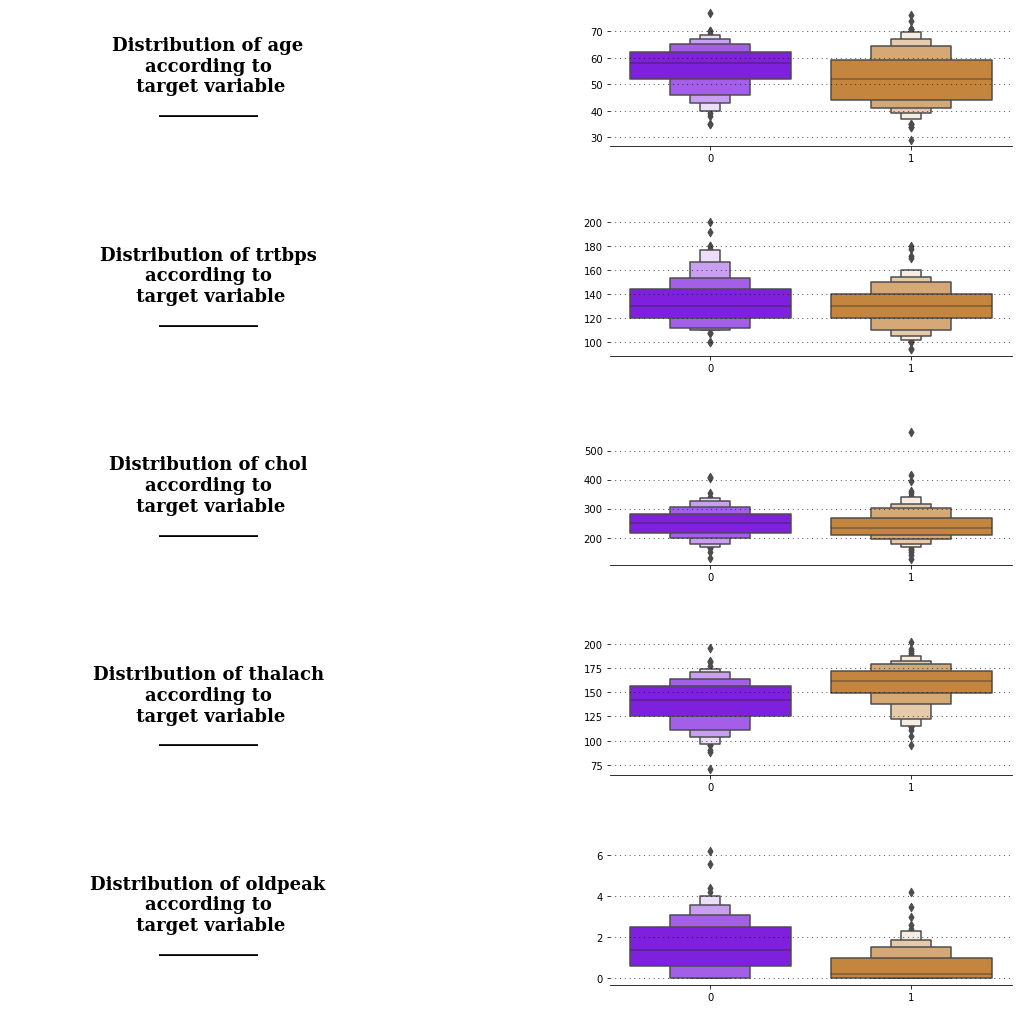

In [31]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#FFFFFF"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
#sns.kdeplot(ax=ax1, data=df_origin, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
sns.boxenplot(ax=ax1, data=df_origin, x='output',y='age',palette=["#8000ff","#da8829"])
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
#sns.kdeplot(ax=ax3, data=df_origin, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
sns.boxenplot(ax=ax3, data=df_origin, x='output',y='trtbps',palette=["#8000ff","#da8829"])
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
#sns.kdeplot(ax=ax5, data=df_origin, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
sns.boxenplot(ax=ax5, data=df_origin, x='output',y='chol',palette=["#8000ff","#da8829"])
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalach\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
#sns.kdeplot(ax=ax7, data=df_origin, x='thalach',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
sns.boxenplot(ax=ax7, data=df_origin, x='output',y='thalach',palette=["#8000ff","#da8829"])
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
#sns.kdeplot(ax=ax9, data=df_origin, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
sns.boxenplot(ax=ax9, data=df_origin, x='output',y='oldpeak',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

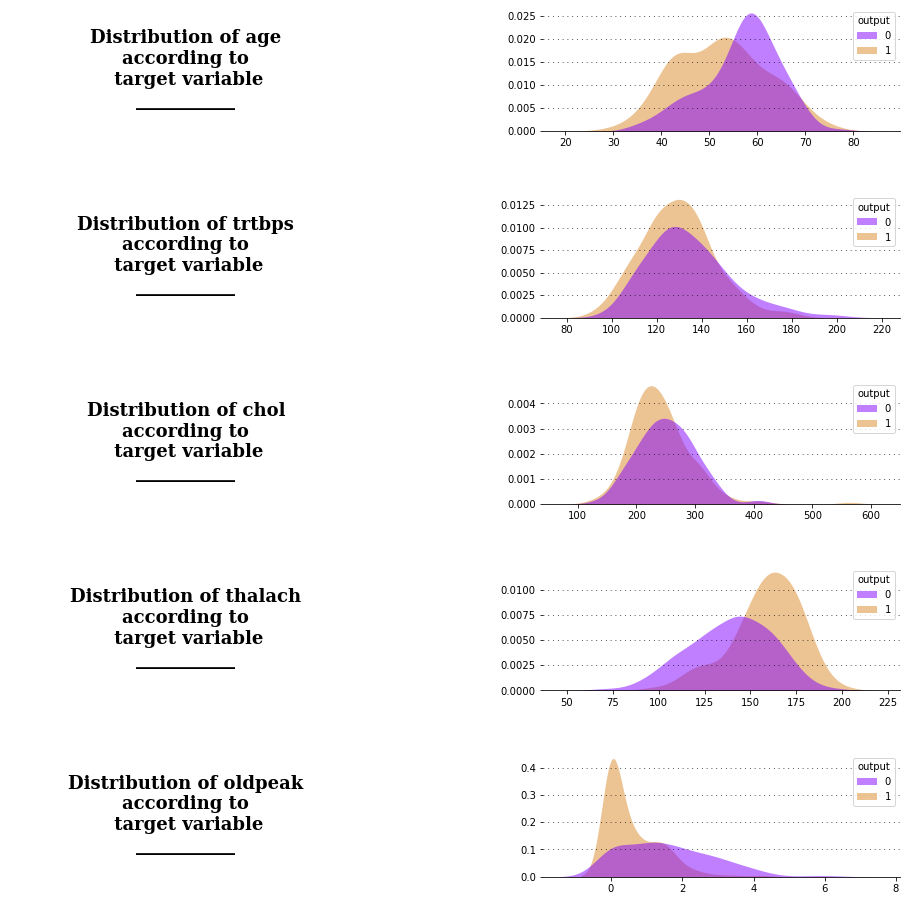

In [32]:
# Distribution of continuous features according to target variable

# By displaying the relationship between a feature and output in a graph, the impact of the feature on the output is more intuitively reflected

fig = plt.figure(figsize=(16,16))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#FFFFFF"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df_origin, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df_origin, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df_origin, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalach\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df_origin, x='thalach',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df_origin, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

### The covariance of the dataset

In [33]:
# Output the covariance matrix of dataset
#　.cov() is used to output the covariance matrix 
df_cov = df_origin.cov().transpose()

df_cov

age       sex        cp      trtbps         chol       fbs  \
age       82.484558 -0.416661 -0.643499   44.495902   100.585076  0.392433   
sex       -0.416661  0.217166 -0.023736   -0.463970    -4.780309  0.007475   
cp        -0.643499 -0.023736  1.065132    0.861714    -4.113774  0.034719   
trtbps    44.495902 -0.463970  0.861714  307.586453   111.967215  1.109042   
chol     100.585076 -4.780309 -4.113774  111.967215  2686.426748  0.245427   
fbs        0.392433  0.007475  0.034719    1.109042     0.245427  0.126877   
restecg   -0.555013 -0.014261  0.024108   -1.052324    -4.116703 -0.015769   
thalach  -82.903318 -0.469871  6.991618  -18.759131   -11.800494 -0.069897   
exng       0.413022  0.031014 -0.191168    0.557111     1.631991  0.004295   
oldpeak    2.214583  0.051993 -0.178821    3.934486     3.246794  0.002377   
slp       -0.944791 -0.008819  0.076137   -1.312832    -0.128964 -0.013147   
ca         2.708183  0.051111 -0.198249    1.775720     4.370763  0.049407   
thal       0.365779  0.058717 -0.101982    0.644023     2.895329 -0.004655   
output    -1.021343 -0.065307  0.223330   -1.267950    -2.203855 -0.004983   

          restecg     thalach      exng   oldpeak       slp        ca  \
age     -0.555013  -82.903318  0.413022  2.214583 -0.944791  2.708183   
sex     -0.014261   -0.469871  0.031014  0.051993 -0.008819  0.051111   
cp       0.024108    6.991618 -0.191168 -0.178821  0.076137 -0.198249   
trtbps  -1.052324  -18.759131  0.557111  3.934486 -1.312832  1.775720   
chol    -4.116703  -11.800494  1.631991  3.246794 -0.128964  4.370763   
fbs     -0.015769   -0.069897  0.004295  0.002377 -0.013147  0.049407   
restecg  0.276528    0.531462 -0.017474 -0.035883  0.030151 -0.043243   
thalach  0.531462  524.646406 -4.076290 -9.153518  5.459369 -5.171267   
exng    -0.017474   -4.076290  0.220707  0.157216 -0.074618  0.057701   
oldpeak -0.035883   -9.153518  0.157216  1.348095 -0.413219  0.279952   
slp      0.030151    5.459369 -0.074618 -0.413219  0.379735 -0.053833   
ca      -0.043243   -5.171267  0.057701  0.279952 -0.053833  0.953708   
thal    -0.004043   -1.446178  0.060619  0.145889 -0.038861  0.088912   
output   0.035998    4.818766 -0.102354 -0.249452  0.106321 -0.204052   

             thal    output  
age      0.365779 -1.021343  
sex      0.058717 -0.065307  
cp      -0.101982  0.223330  
trtbps   0.644023 -1.267950  
chol     2.895329 -2.203855  
fbs     -0.004655 -0.004983  
restecg -0.004043  0.035998  
thalach -1.446178  4.818766  
exng     0.060619 -0.102354  
oldpeak  0.145889 -0.249452  
slp     -0.038861  0.106321  
ca       0.088912 -0.204052  
thal     0.350819 -0.105370  
output  -0.105370  0.248836

In [34]:
# keep 3 decimal places
df_cov = df_origin.cov().transpose()
df_cov_around3 = np.around(df_cov,3)
df_cov_around3

age    sex     cp   trtbps      chol    fbs  restecg  thalach  \
age       82.485 -0.417 -0.643   44.496   100.585  0.392   -0.555  -82.903   
sex       -0.417  0.217 -0.024   -0.464    -4.780  0.007   -0.014   -0.470   
cp        -0.643 -0.024  1.065    0.862    -4.114  0.035    0.024    6.992   
trtbps    44.496 -0.464  0.862  307.586   111.967  1.109   -1.052  -18.759   
chol     100.585 -4.780 -4.114  111.967  2686.427  0.245   -4.117  -11.800   
fbs        0.392  0.007  0.035    1.109     0.245  0.127   -0.016   -0.070   
restecg   -0.555 -0.014  0.024   -1.052    -4.117 -0.016    0.277    0.531   
thalach  -82.903 -0.470  6.992  -18.759   -11.800 -0.070    0.531  524.646   
exng       0.413  0.031 -0.191    0.557     1.632  0.004   -0.017   -4.076   
oldpeak    2.215  0.052 -0.179    3.934     3.247  0.002   -0.036   -9.154   
slp       -0.945 -0.009  0.076   -1.313    -0.129 -0.013    0.030    5.459   
ca         2.708  0.051 -0.198    1.776     4.371  0.049   -0.043   -5.171   
thal       0.366  0.059 -0.102    0.644     2.895 -0.005   -0.004   -1.446   
output    -1.021 -0.065  0.223   -1.268    -2.204 -0.005    0.036    4.819   

          exng  oldpeak    slp     ca   thal  output  
age      0.413    2.215 -0.945  2.708  0.366  -1.021  
sex      0.031    0.052 -0.009  0.051  0.059  -0.065  
cp      -0.191   -0.179  0.076 -0.198 -0.102   0.223  
trtbps   0.557    3.934 -1.313  1.776  0.644  -1.268  
chol     1.632    3.247 -0.129  4.371  2.895  -2.204  
fbs      0.004    0.002 -0.013  0.049 -0.005  -0.005  
restecg -0.017   -0.036  0.030 -0.043 -0.004   0.036  
thalach -4.076   -9.154  5.459 -5.171 -1.446   4.819  
exng     0.221    0.157 -0.075  0.058  0.061  -0.102  
oldpeak  0.157    1.348 -0.413  0.280  0.146  -0.249  
slp     -0.075   -0.413  0.380 -0.054 -0.039   0.106  
ca       0.058    0.280 -0.054  0.954  0.089  -0.204  
thal     0.061    0.146 -0.039  0.089  0.351  -0.105  
output  -0.102   -0.249  0.106 -0.204 -0.105   0.249

In [35]:
# keep 2 decimal places
df_cov = df_origin.cov().transpose()
df_cov_around2 = np.around(df_cov,2)
df_cov_around2

age   sex    cp  trtbps     chol   fbs  restecg  thalach  exng  \
age       82.48 -0.42 -0.64   44.50   100.59  0.39    -0.56   -82.90  0.41   
sex       -0.42  0.22 -0.02   -0.46    -4.78  0.01    -0.01    -0.47  0.03   
cp        -0.64 -0.02  1.07    0.86    -4.11  0.03     0.02     6.99 -0.19   
trtbps    44.50 -0.46  0.86  307.59   111.97  1.11    -1.05   -18.76  0.56   
chol     100.59 -4.78 -4.11  111.97  2686.43  0.25    -4.12   -11.80  1.63   
fbs        0.39  0.01  0.03    1.11     0.25  0.13    -0.02    -0.07  0.00   
restecg   -0.56 -0.01  0.02   -1.05    -4.12 -0.02     0.28     0.53 -0.02   
thalach  -82.90 -0.47  6.99  -18.76   -11.80 -0.07     0.53   524.65 -4.08   
exng       0.41  0.03 -0.19    0.56     1.63  0.00    -0.02    -4.08  0.22   
oldpeak    2.21  0.05 -0.18    3.93     3.25  0.00    -0.04    -9.15  0.16   
slp       -0.94 -0.01  0.08   -1.31    -0.13 -0.01     0.03     5.46 -0.07   
ca         2.71  0.05 -0.20    1.78     4.37  0.05    -0.04    -5.17  0.06   
thal       0.37  0.06 -0.10    0.64     2.90 -0.00    -0.00    -1.45  0.06   
output    -1.02 -0.07  0.22   -1.27    -2.20 -0.00     0.04     4.82 -0.10   

         oldpeak   slp    ca  thal  output  
age         2.21 -0.94  2.71  0.37   -1.02  
sex         0.05 -0.01  0.05  0.06   -0.07  
cp         -0.18  0.08 -0.20 -0.10    0.22  
trtbps      3.93 -1.31  1.78  0.64   -1.27  
chol        3.25 -0.13  4.37  2.90   -2.20  
fbs         0.00 -0.01  0.05 -0.00   -0.00  
restecg    -0.04  0.03 -0.04 -0.00    0.04  
thalach    -9.15  5.46 -5.17 -1.45    4.82  
exng        0.16 -0.07  0.06  0.06   -0.10  
oldpeak     1.35 -0.41  0.28  0.15   -0.25  
slp        -0.41  0.38 -0.05 -0.04    0.11  
ca          0.28 -0.05  0.95  0.09   -0.20  
thal        0.15 -0.04  0.09  0.35   -0.11  
output     -0.25  0.11 -0.20 -0.11    0.25

### The correlation coefficient matrix of the dataset

In [36]:
# Output the correlation coefficient matrix of dataset
#　.corr() is used to output the correlation coefficient matrix
df_corr = df_origin.corr().transpose()

df_corr

age       sex        cp    trtbps      chol       fbs   restecg  \
age      1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308 -0.116211   
sex     -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032 -0.058196   
cp      -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444  0.044421   
trtbps   0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531 -0.114103   
chol     0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294 -0.151040   
fbs      0.121308  0.045032  0.094444  0.177531  0.013294  1.000000 -0.084189   
restecg -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189  1.000000   
thalach -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567  0.044123   
exng     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665 -0.070733   
oldpeak  0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747 -0.058770   
slp     -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894  0.093045   
ca       0.305340  0.112309 -0.196699  0.103677  0.086350  0.142032 -0.084205   
thal     0.067997  0.212731 -0.166833  0.061998  0.094312 -0.022066 -0.012982   
output  -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046  0.137230   

          thalach      exng   oldpeak       slp        ca      thal    output  
age     -0.398522  0.096801  0.210013 -0.168814  0.305340  0.067997 -0.225439  
sex     -0.044020  0.141664  0.096093 -0.030711  0.112309  0.212731 -0.280937  
cp       0.295762 -0.394280 -0.149230  0.119717 -0.196699 -0.166833  0.433798  
trtbps  -0.046698  0.067616  0.193216 -0.121475  0.103677  0.061998 -0.144931  
chol    -0.009940  0.067023  0.053952 -0.004038  0.086350  0.094312 -0.085239  
fbs     -0.008567  0.025665  0.005747 -0.059894  0.142032 -0.022066 -0.028046  
restecg  0.044123 -0.070733 -0.058770  0.093045 -0.084205 -0.012982  0.137230  
thalach  1.000000 -0.378812 -0.344187  0.386784 -0.231183 -0.106598  0.421741  
exng    -0.378812  1.000000  0.288223 -0.257748  0.125768  0.217851 -0.436757  
oldpeak -0.344187  0.288223  1.000000 -0.577537  0.246897  0.212139 -0.430696  
slp      0.386784 -0.257748 -0.577537  1.000000 -0.089453 -0.106471  0.345877  
ca      -0.231183  0.125768  0.246897 -0.089453  1.000000  0.153714 -0.418868  
thal    -0.106598  0.217851  0.212139 -0.106471  0.153714  1.000000 -0.356631  
output   0.421741 -0.436757 -0.430696  0.345877 -0.418868 -0.356631  1.000000

In [37]:
# keep 3 decimal places
df_corr = df_origin.corr().transpose()
df_corr_around3 = np.around(df_corr,3)
df_corr_around3

age    sex     cp  trtbps   chol    fbs  restecg  thalach   exng  \
age      1.000 -0.098 -0.069   0.279  0.214  0.121   -0.116   -0.399  0.097   
sex     -0.098  1.000 -0.049  -0.057 -0.198  0.045   -0.058   -0.044  0.142   
cp      -0.069 -0.049  1.000   0.048 -0.077  0.094    0.044    0.296 -0.394   
trtbps   0.279 -0.057  0.048   1.000  0.123  0.178   -0.114   -0.047  0.068   
chol     0.214 -0.198 -0.077   0.123  1.000  0.013   -0.151   -0.010  0.067   
fbs      0.121  0.045  0.094   0.178  0.013  1.000   -0.084   -0.009  0.026   
restecg -0.116 -0.058  0.044  -0.114 -0.151 -0.084    1.000    0.044 -0.071   
thalach -0.399 -0.044  0.296  -0.047 -0.010 -0.009    0.044    1.000 -0.379   
exng     0.097  0.142 -0.394   0.068  0.067  0.026   -0.071   -0.379  1.000   
oldpeak  0.210  0.096 -0.149   0.193  0.054  0.006   -0.059   -0.344  0.288   
slp     -0.169 -0.031  0.120  -0.121 -0.004 -0.060    0.093    0.387 -0.258   
ca       0.305  0.112 -0.197   0.104  0.086  0.142   -0.084   -0.231  0.126   
thal     0.068  0.213 -0.167   0.062  0.094 -0.022   -0.013   -0.107  0.218   
output  -0.225 -0.281  0.434  -0.145 -0.085 -0.028    0.137    0.422 -0.437   

         oldpeak    slp     ca   thal  output  
age        0.210 -0.169  0.305  0.068  -0.225  
sex        0.096 -0.031  0.112  0.213  -0.281  
cp        -0.149  0.120 -0.197 -0.167   0.434  
trtbps     0.193 -0.121  0.104  0.062  -0.145  
chol       0.054 -0.004  0.086  0.094  -0.085  
fbs        0.006 -0.060  0.142 -0.022  -0.028  
restecg   -0.059  0.093 -0.084 -0.013   0.137  
thalach   -0.344  0.387 -0.231 -0.107   0.422  
exng       0.288 -0.258  0.126  0.218  -0.437  
oldpeak    1.000 -0.578  0.247  0.212  -0.431  
slp       -0.578  1.000 -0.089 -0.106   0.346  
ca         0.247 -0.089  1.000  0.154  -0.419  
thal       0.212 -0.106  0.154  1.000  -0.357  
output    -0.431  0.346 -0.419 -0.357   1.000

In [38]:
# keep 2 decimal places
df_corr = df_origin.corr().transpose()
df_corr_around2 = np.around(df_corr,2)
df_corr_around2

age   sex    cp  trtbps  chol   fbs  restecg  thalach  exng  \
age      1.00 -0.10 -0.07    0.28  0.21  0.12    -0.12    -0.40  0.10   
sex     -0.10  1.00 -0.05   -0.06 -0.20  0.05    -0.06    -0.04  0.14   
cp      -0.07 -0.05  1.00    0.05 -0.08  0.09     0.04     0.30 -0.39   
trtbps   0.28 -0.06  0.05    1.00  0.12  0.18    -0.11    -0.05  0.07   
chol     0.21 -0.20 -0.08    0.12  1.00  0.01    -0.15    -0.01  0.07   
fbs      0.12  0.05  0.09    0.18  0.01  1.00    -0.08    -0.01  0.03   
restecg -0.12 -0.06  0.04   -0.11 -0.15 -0.08     1.00     0.04 -0.07   
thalach -0.40 -0.04  0.30   -0.05 -0.01 -0.01     0.04     1.00 -0.38   
exng     0.10  0.14 -0.39    0.07  0.07  0.03    -0.07    -0.38  1.00   
oldpeak  0.21  0.10 -0.15    0.19  0.05  0.01    -0.06    -0.34  0.29   
slp     -0.17 -0.03  0.12   -0.12 -0.00 -0.06     0.09     0.39 -0.26   
ca       0.31  0.11 -0.20    0.10  0.09  0.14    -0.08    -0.23  0.13   
thal     0.07  0.21 -0.17    0.06  0.09 -0.02    -0.01    -0.11  0.22   
output  -0.23 -0.28  0.43   -0.14 -0.09 -0.03     0.14     0.42 -0.44   

         oldpeak   slp    ca  thal  output  
age         0.21 -0.17  0.31  0.07   -0.23  
sex         0.10 -0.03  0.11  0.21   -0.28  
cp         -0.15  0.12 -0.20 -0.17    0.43  
trtbps      0.19 -0.12  0.10  0.06   -0.14  
chol        0.05 -0.00  0.09  0.09   -0.09  
fbs         0.01 -0.06  0.14 -0.02   -0.03  
restecg    -0.06  0.09 -0.08 -0.01    0.14  
thalach    -0.34  0.39 -0.23 -0.11    0.42  
exng        0.29 -0.26  0.13  0.22   -0.44  
oldpeak     1.00 -0.58  0.25  0.21   -0.43  
slp        -0.58  1.00 -0.09 -0.11    0.35  
ca          0.25 -0.09  1.00  0.15   -0.42  
thal        0.21 -0.11  0.15  1.00   -0.36  
output     -0.43  0.35 -0.42 -0.36    1.00

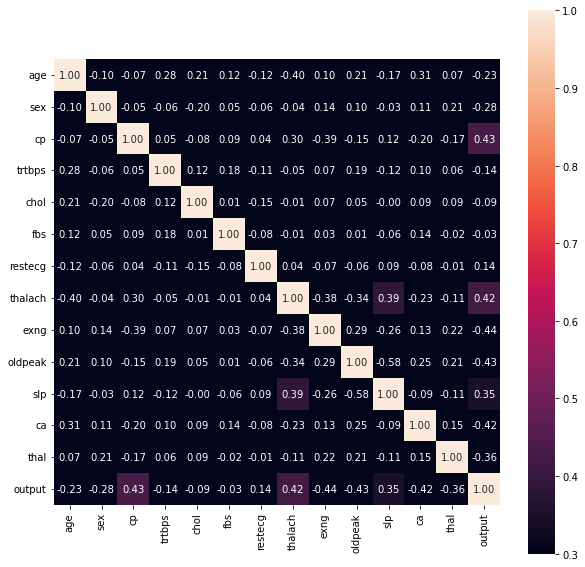

In [39]:
# Output correlation coefficient raw data (with 2 decimal places) matrix

# Set the size of the chart
plt.subplots(figsize=(10, 10))

# df_corr_abs = abs(df_corr)

# Draw the chart
sns.heatmap(
    
    # dataset
    df_corr,
    
    # Data input
    annot=True, 
    
    # Set the boundaries of the acquired data（0.3 - 1.0）
     vmax=1,
    
     vmin=0.3, 
    
    # Set the image format to square
    square = True, 
    
    # Set the color of the chart
    #cmap="Blues",
    
    # Format the data in the chart (with two decimal places)
    fmt='.2f',

)

# show graph
plt.show()

<Figure size 864x864 with 0 Axes>

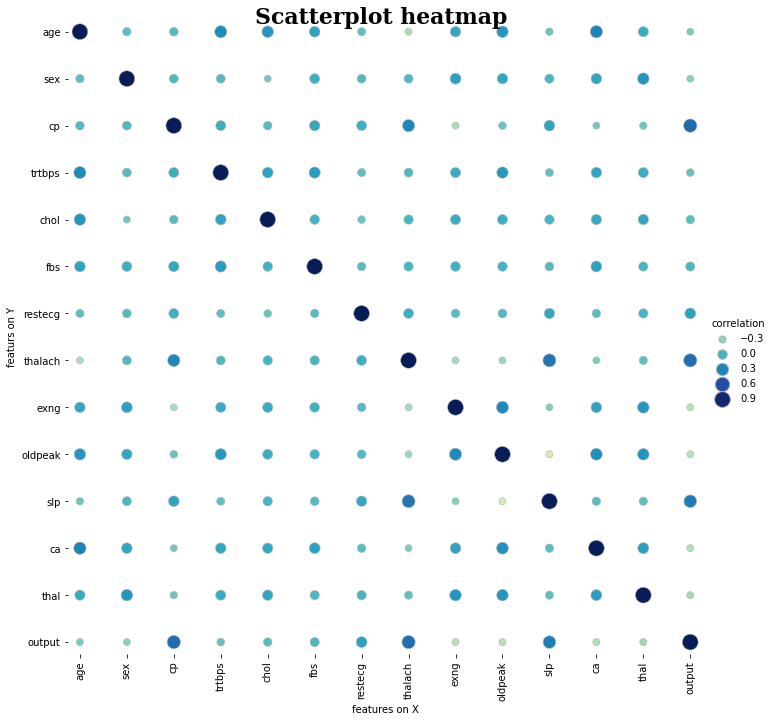

In [40]:
# Representing the Correlation Matrix Using Scatterplot heatmap

fig = plt.figure(figsize=(12,12))
corr_mat = df_origin.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

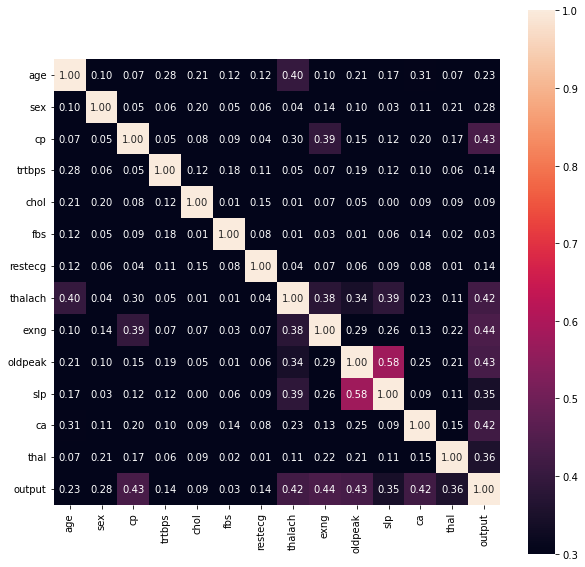

In [41]:
# Not considered positive or negative, only the correlation is considered

plt.subplots(figsize=(10, 10))

df_corr_abs = abs(df_corr)

sns.heatmap(
    
    df_corr_abs,
    
    annot=True, 
    
     vmax=1,
    
     vmin=0.3, 
    
    square = True, 
    
    fmt='.2f',

)

plt.show()

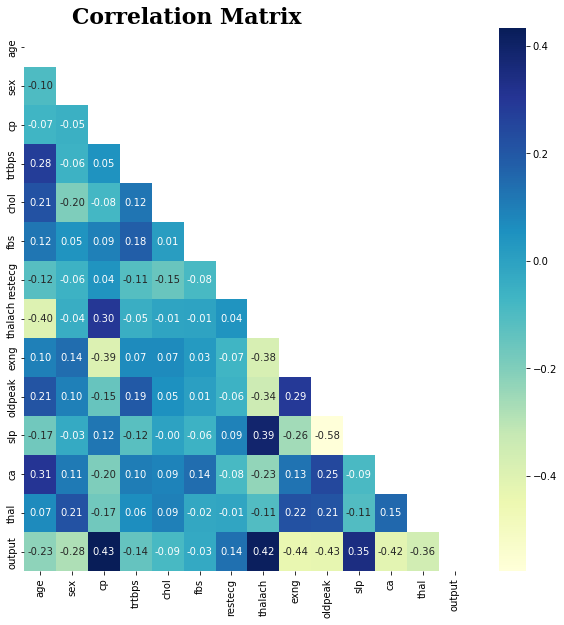

In [42]:
# Use a graph to represent the Correlation Matrix

fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]

# Mask data above the positive diagonal (including the diagonal)
mask = np.triu(np.ones_like(df_corr))

ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")

# Generate a correlation matrix for the entire dataset
#df_corr = df_origin.corr().transpose()

# Keep one decimal place
#sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')

# Keep two decimal place
sns.heatmap(df_corr,mask=mask,fmt=".2f",annot=True,cmap='YlGnBu')

plt.show()

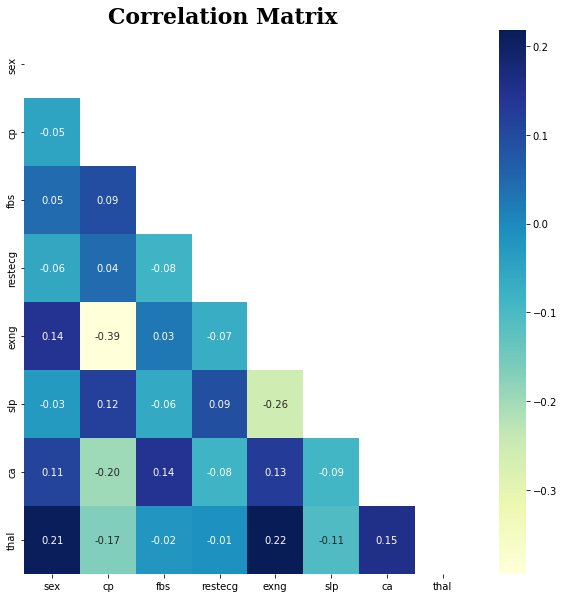

In [43]:
# Use a graph to represent the Correlation Matrix

fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]

ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")

df_corr_1 = df_origin[categorical_cols].corr().transpose()

# Mask data above the positive diagonal (including the diagonal)
# Generate a mask of 14 features
#mask = np.triu(np.ones_like(df_corr))
# Generate a mask of 8 features which in categorical_cols
mask = np.triu(np.ones_like(df_corr_1))

# Keep one decimal place
#sns.heatmap(df_corr_1,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')

# Keep two decimal place
sns.heatmap(df_corr_1,mask=mask,fmt=".2f",annot=True,cmap='YlGnBu')

plt.show()

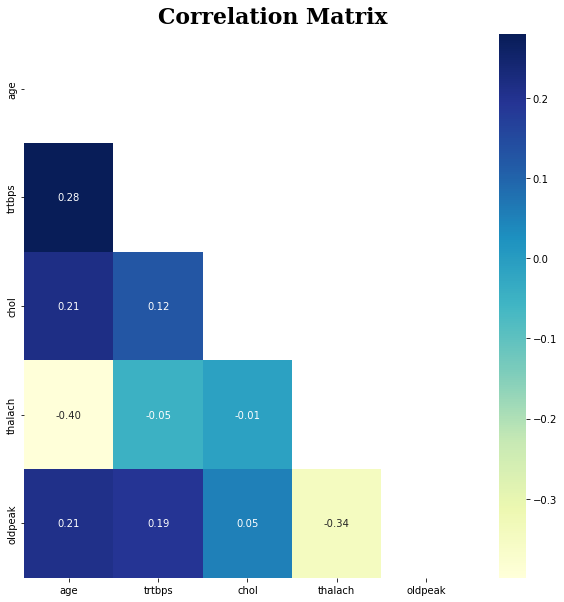

In [44]:
# Use a graph to represent the Correlation Matrix

fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["#5833ff","#da8829"]

ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")

df_corr_2 = df_origin[numerical_cols].corr().transpose()

# Mask data above the positive diagonal (including the diagonal)
# Generate a mask of 14 features
#mask = np.triu(np.ones_like(df_corr))
# Generate a mask of 8 features which in numerical_cols
mask = np.triu(np.ones_like(df_corr_2))

# Keep one decimal place
#sns.heatmap(df_corr_2,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')

# Keep two decimal place
sns.heatmap(df_corr_2,mask=mask,fmt=".2f",annot=True,cmap='YlGnBu')
plt.show()

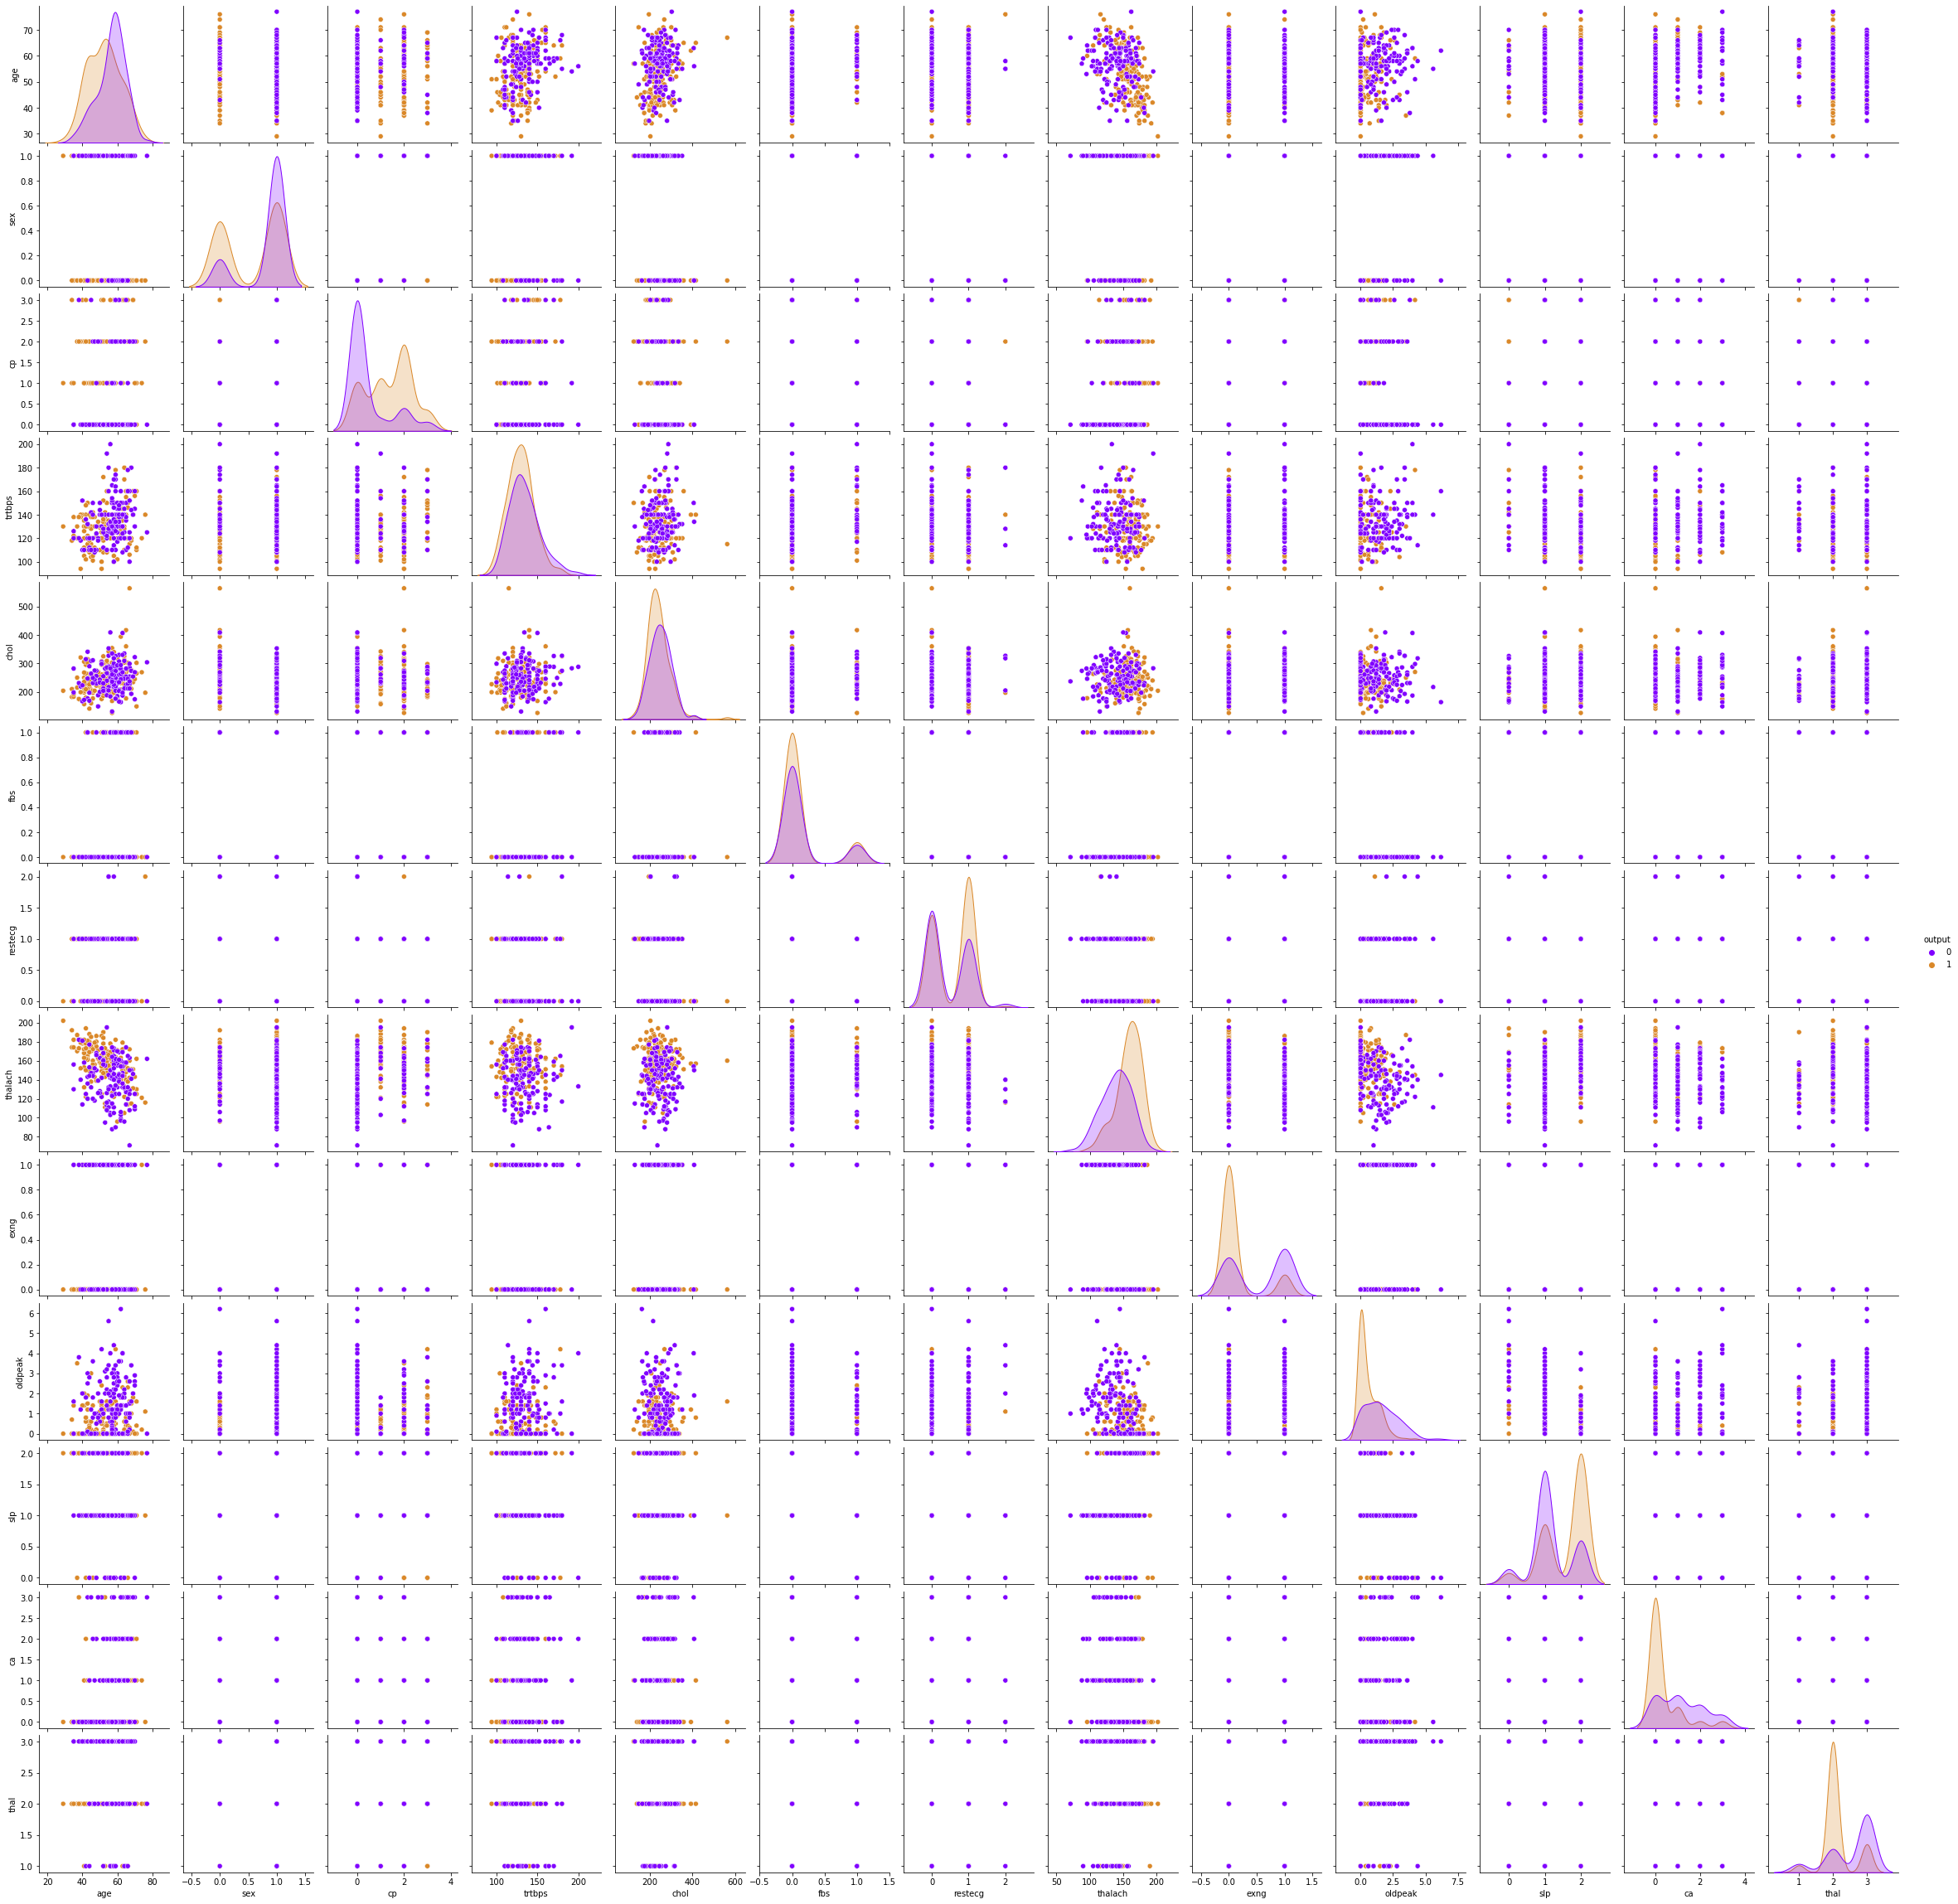

In [45]:
# Generate the relationship between 13 features (for output)
sns.pairplot(df_origin,hue='output',palette = ["#8000ff","#da8829"])
plt.show()

#### The most closely related pairs of variables
Pairs of variables with a correlation coefficient higher than 0.30 
1 age--thalach:       -0.40     
2 age--ca:       +0.31    
3 cp--thalach:       +0.30    
4 cp--exng:         -0.39     
5 Thalach--exng:     -0.38    
6 Thalach--oldpeak:    -0.34    
7 Thalach--slp:       +0.39      
8 oldpeak--slp:      -0.58     

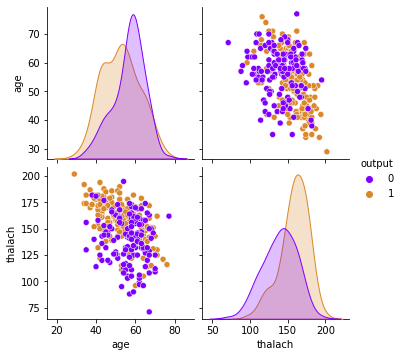

In [46]:
#1 age--thalach       -0.40   
sns.pairplot(df_origin, hue='output',vars=["age","thalach"], palette = ["#8000ff","#da8829"])
plt.show()

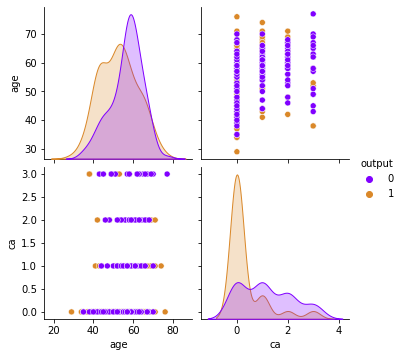

In [47]:
#2 age--ca          +0.31  
sns.pairplot(df_origin, hue='output',vars=["age","ca"], palette = ["#8000ff","#da8829"])
plt.show()

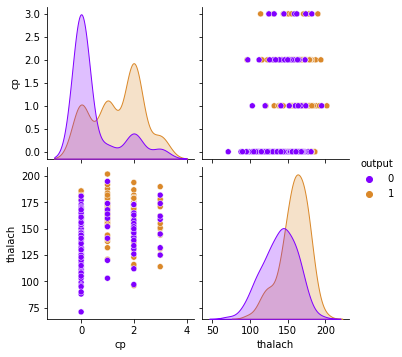

In [48]:
#3 cp--thalach       +0.30  
sns.pairplot(df_origin, hue='output',vars=["cp","thalach"], palette = ["#8000ff","#da8829"])
plt.show()

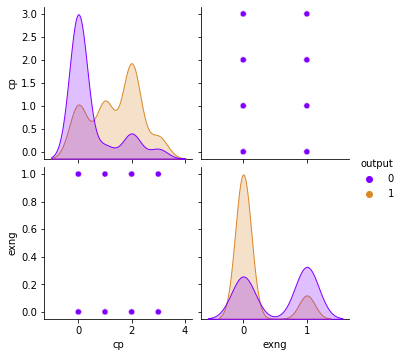

In [49]:
#4 cp--exng         
sns.pairplot(df_origin, hue='output',vars=["cp","exng"], palette = ["#8000ff","#da8829"])
plt.show()

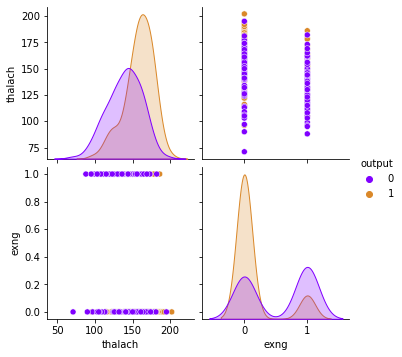

In [50]:
#5 Thalach--exng     -0.38  
sns.pairplot(df_origin, hue='output',vars=["thalach","exng"], palette = ["#8000ff","#da8829"])
plt.show()

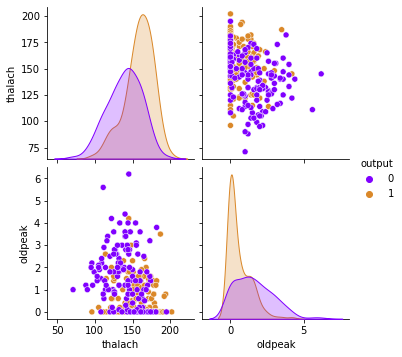

In [51]:
#6 Thalach--oldpeak   -0.34  
sns.pairplot(df_origin, hue='output',vars=["thalach","oldpeak"], palette = ["#8000ff","#da8829"])
plt.show()

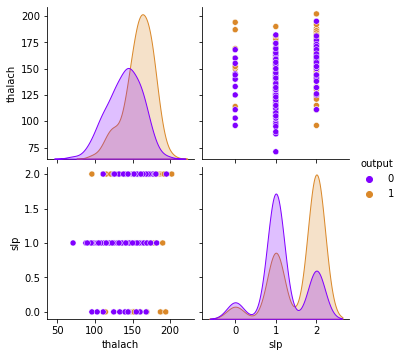

In [52]:
#7 Thalach--slp      +0.39   
sns.pairplot(df_origin, hue='output',vars=["thalach","slp"], palette = ["#8000ff","#da8829"])
plt.show()

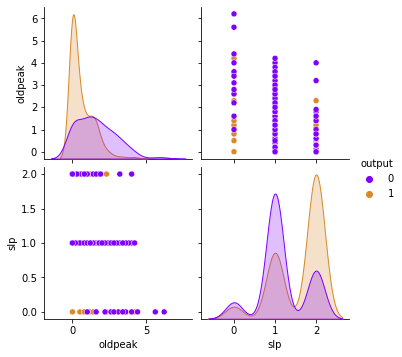

In [53]:
#8 oldpeak--slp      -0.58 
sns.pairplot(df_origin, hue='output',vars=["oldpeak","slp"], palette = ["#8000ff","#da8829"])
plt.show()

### Original closeness feature pairs (correlation coefficient absolute value above 0.30)   
2 charts  

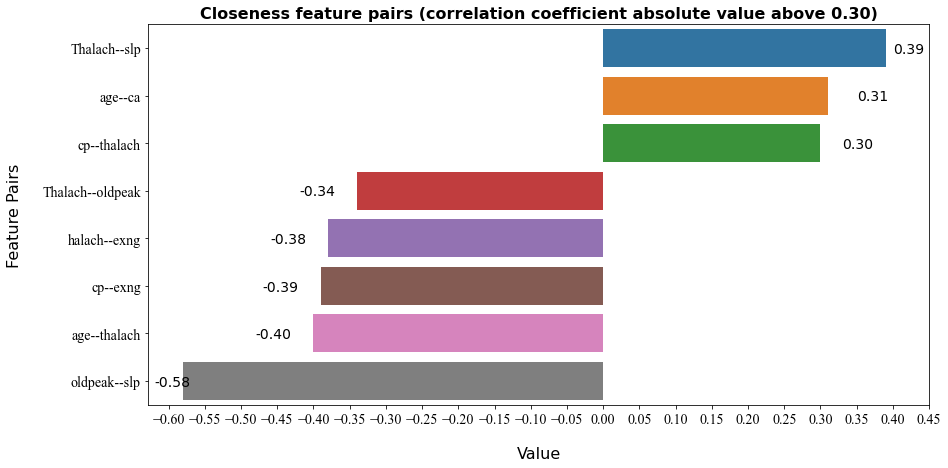

In [54]:
# Plot to represent pairs of data whose correlation coefficient absolute value is greater than 0.30

models = pd.DataFrame({
    'Feature' : ['Thalach--slp', 'age--ca', 'cp--thalach', 'Thalach--oldpeak', 'halach--exng','cp--exng', 'age--thalach', 'oldpeak--slp'],
    'Value' : [+0.39,
               +0.31,
               +0.30,
               -0.34,
               -0.38,
               -0.39,
               -0.40,
               -0.58
              ]
})

plt.figure(figsize = (14, 7))
sns.barplot(x = 'Value', y = 'Feature', data = models)

# title of the chart
plt.title('Closeness feature pairs (correlation coefficient absolute value above 0.30)',fontsize = 16, fontweight = 'bold', alpha = 1)

# The distance between the label and the coordinate axis
plt.xlabel('Value', fontsize = 16, labelpad=20)
plt.ylabel('Feature Pairs', fontsize = 16, labelpad=20)

# x-axis data accuracy
my_x_ticks = np.arange(-0.60, 0.50, 0.05)
plt.xticks(my_x_ticks)

# Axis text size
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)


# Add data text
plt.text(0.40, 0.10, '0.39', size = 14)
plt.text(0.35, 1.10, '0.31', size = 14)
plt.text(0.33, 2.10, '0.30', size = 14)

plt.text(-0.42, 3.10, '-0.34', size = 14)
plt.text(-0.46, 4.10, '-0.38', size = 14)
plt.text(-0.47, 5.10, '-0.39', size = 14)
plt.text(-0.48, 6.10, '-0.40', size = 14)
plt.text(-0.62, 7.10, '-0.58', size = 14)
    
plt.show()

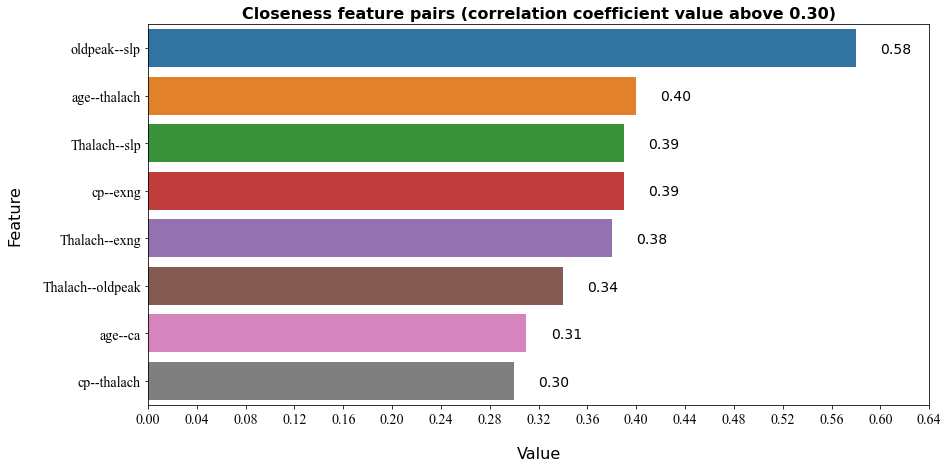

In [55]:
# Plot to represent pairs of data whose correlation coefficient value is greater than 0.30

models = pd.DataFrame({
    'Feature' : ['oldpeak--slp',
                 'age--thalach',
                 'Thalach--slp',
                 'cp--exng',
                 'Thalach--exng',
                 'Thalach--oldpeak',
                 'age--ca', 'cp--thalach'
                ],
    'Value' : [0.58,
               0.40,
               0.39,
               0.39,
               0.38,
               0.34,
               0.31,
               0.30
              ]
})

plt.figure(figsize = (14, 7))
sns.barplot(x = 'Value', y = 'Feature', data = models)

# title of the chart
plt.title('Closeness feature pairs (correlation coefficient value above 0.30)',fontsize = 16, fontweight = 'bold', alpha = 1)

# The distance between the label and the coordinate axis
plt.xlabel('Value', fontsize = 16, labelpad=20)
plt.ylabel('Feature', fontsize = 16, labelpad=20)

# x-axis data accuracy
my_x_ticks = np.arange(0.00, 0.68, 0.04)
plt.xticks(my_x_ticks)

# Axis text size
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)

# Add data text
plt.text(0.60, 0.10, '0.58', size = 14)
plt.text(0.42, 1.10, '0.40', size = 14)
plt.text(0.41, 2.10, '0.39', size = 14)
plt.text(0.41, 3.10, '0.39', size = 14)
plt.text(0.40, 4.10, '0.38', size = 14)
plt.text(0.36, 5.10, '0.34', size = 14)
plt.text(0.33, 6.10, '0.31', size = 14)
plt.text(0.32, 7.10, '0.30', size = 14)
    
plt.show()

### Plot to represent contribution ranking of individual features to the target
2 charts

In [56]:
# Correlation coefficients between all variables and output
df_output_row1 = df_corr_around2.iloc[13]
#df_output_row1
df_output_row2 = df_output_row1[:13]
df_output_row2

age       -0.23
sex       -0.28
cp         0.43
trtbps    -0.14
chol      -0.09
fbs       -0.03
restecg    0.14
thalach    0.42
exng      -0.44
oldpeak   -0.43
slp        0.35
ca        -0.42
thal      -0.36
Name: output, dtype: float64

In [57]:
df_output_row2_sort1 = df_output_row2.sort_values(ascending=False);
df_output_row2_sort1

cp         0.43
thalach    0.42
slp        0.35
restecg    0.14
fbs       -0.03
chol      -0.09
trtbps    -0.14
age       -0.23
sex       -0.28
thal      -0.36
ca        -0.42
oldpeak   -0.43
exng      -0.44
Name: output, dtype: float64

In [58]:
# take absolute value
df_output_row2_abs = abs(df_output_row2)
df_output_row2_abs

age        0.23
sex        0.28
cp         0.43
trtbps     0.14
chol       0.09
fbs        0.03
restecg    0.14
thalach    0.42
exng       0.44
oldpeak    0.43
slp        0.35
ca         0.42
thal       0.36
Name: output, dtype: float64

In [59]:
df_output_row2_abs_sort = df_output_row2_abs.sort_values(ascending=False);
df_output_row2_abs_sort

exng       0.44
cp         0.43
oldpeak    0.43
thalach    0.42
ca         0.42
thal       0.36
slp        0.35
sex        0.28
age        0.23
trtbps     0.14
restecg    0.14
chol       0.09
fbs        0.03
Name: output, dtype: float64

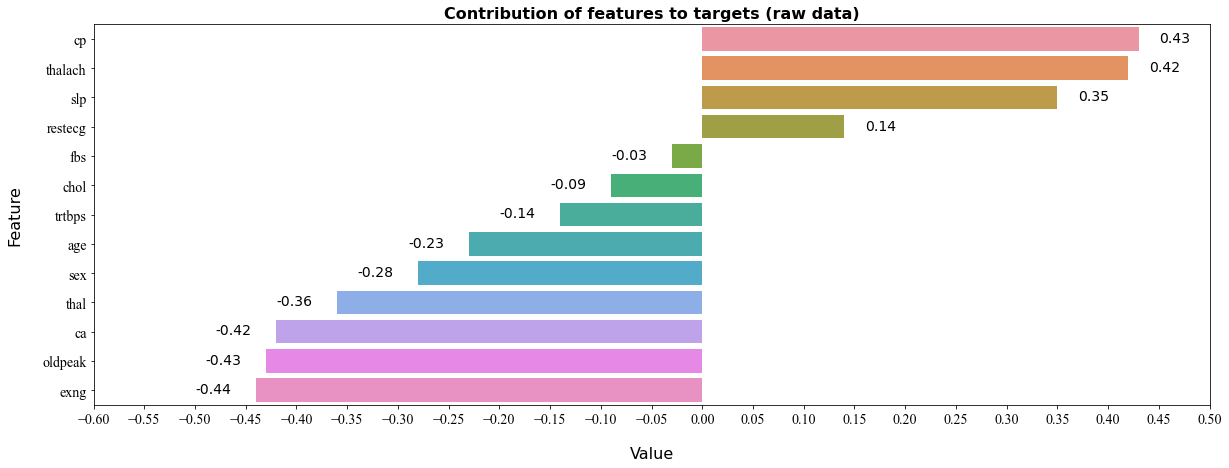

In [60]:
# Contribution of features to targets (raw data)
# cp         0.43
# thalach    0.42
# slp        0.35
# restecg    0.14
# fbs       -0.03
# chol      -0.09
# trtbps    -0.14
# age       -0.23
# sex       -0.28
# thal      -0.36
# ca        -0.42
# oldpeak   -0.43
# exng      -0.44

# df_output_row2_sort1

models = pd.DataFrame({
    'Feature' : ['cp', 
                 'thalach', 
                 'slp', 
                 'restecg', 
                 'fbs',
                 'chol', 
                 'trtbps', 
                 'age', 
                 'sex', 
                 'thal',
                 'ca', 
                 'oldpeak', 
                 'exng'],
    'Value' : [df_output_row2_sort1[0],
               df_output_row2_sort1[1],
               df_output_row2_sort1[2],
               df_output_row2_sort1[3],
               df_output_row2_sort1[4],
               df_output_row2_sort1[5],
               df_output_row2_sort1[6],
               df_output_row2_sort1[7],
               df_output_row2_sort1[8],
               df_output_row2_sort1[9],
               df_output_row2_sort1[10],
               df_output_row2_sort1[11],
               df_output_row2_sort1[12]
              ]
})

plt.figure(figsize = (20, 7))
sns.barplot(x = 'Value', y = 'Feature', data = models)

plt.title('Contribution of features to targets (raw data)',fontsize = 16, fontweight = 'bold', alpha = 1)

plt.xlabel('Value', fontsize = 16, labelpad=20)
plt.ylabel('Feature', fontsize = 16, labelpad=20)

my_x_ticks = np.arange(-0.60, 0.55, 0.05)
plt.xticks(my_x_ticks)

plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)

plt.text(0.45, 0.10, '0.43', size = 14)
plt.text(0.44, 1.10, '0.42', size = 14)
plt.text(0.37, 2.10, '0.35', size = 14)
plt.text(0.16, 3.10, '0.14', size = 14)

plt.text(-0.09, 4.10, '-0.03', size = 14)
plt.text(-0.15, 5.10, '-0.09', size = 14)
plt.text(-0.20, 6.10, '-0.14', size = 14)
plt.text(-0.29, 7.10, '-0.23', size = 14)
plt.text(-0.34, 8.10, '-0.28', size = 14)
plt.text(-0.42, 9.10, '-0.36', size = 14)
plt.text(-0.48, 10.10, '-0.42', size = 14)
plt.text(-0.49, 11.10, '-0.43', size = 14)
plt.text(-0.50, 12.10, '-0.44', size = 14)

plt.show()

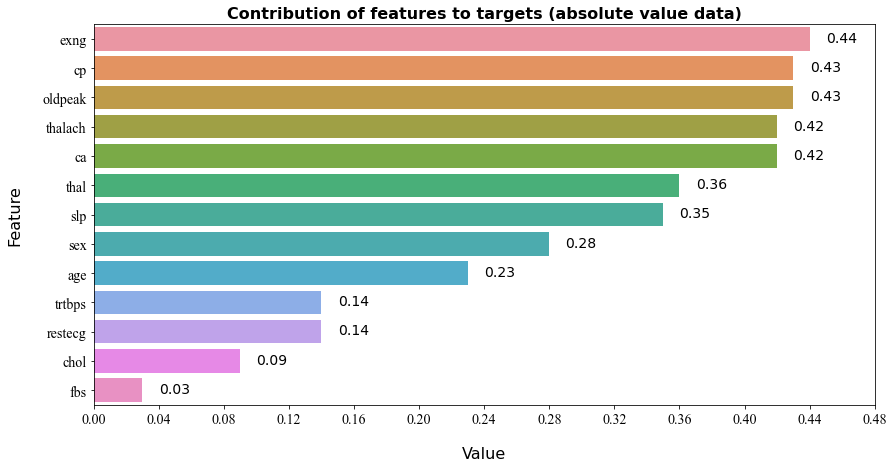

In [61]:
# Contribution of features to targets (absolute value data)
models = pd.DataFrame({
    'Feature' : ['exng', 
                 'cp', 
                 'oldpeak', 
                 'thalach', 
                 'ca',
                 'thal', 
                 'slp', 
                 'sex', 
                 'age', 
                 'trtbps',
                 'restecg', 
                 'chol', 
                 'fbs'],
    'Value' : [df_output_row2_abs_sort[0],
               df_output_row2_abs_sort[1],
               df_output_row2_abs_sort[2],
               df_output_row2_abs_sort[3],
               df_output_row2_abs_sort[4],
               df_output_row2_abs_sort[5],
               df_output_row2_abs_sort[6],
               df_output_row2_abs_sort[7],
               df_output_row2_abs_sort[8],
               df_output_row2_abs_sort[9],
               df_output_row2_abs_sort[10],
               df_output_row2_abs_sort[11],
               df_output_row2_abs_sort[12]
              ]
})

plt.figure(figsize = (14, 7))
sns.barplot(x = 'Value', y = 'Feature', data = models)

plt.title('Contribution of features to targets (absolute value data)',fontsize = 16, fontweight = 'bold', alpha = 1)

plt.xlabel('Value', fontsize = 16, labelpad=20)
plt.ylabel('Feature', fontsize = 16, labelpad=20)

my_x_ticks = np.arange(0.00, 0.52, 0.04)
plt.xticks(my_x_ticks)

plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)

plt.text(0.45, 0.10, '0.44', size = 14)
plt.text(0.44, 1.10, '0.43', size = 14)
plt.text(0.44, 2.10, '0.43', size = 14)
plt.text(0.43, 3.10, '0.42', size = 14)
plt.text(0.43, 4.10, '0.42', size = 14)
plt.text(0.37, 5.10, '0.36', size = 14)
plt.text(0.36, 6.10, '0.35', size = 14)
plt.text(0.29, 7.10, '0.28', size = 14)
plt.text(0.24, 8.10, '0.23', size = 14)
plt.text(0.15, 9.10, '0.14', size = 14)
plt.text(0.15, 10.10, '0.14', size = 14)
plt.text(0.10, 11.10, '0.09', size = 14)
plt.text(0.04, 12.10, '0.03', size = 14)
    
plt.show()

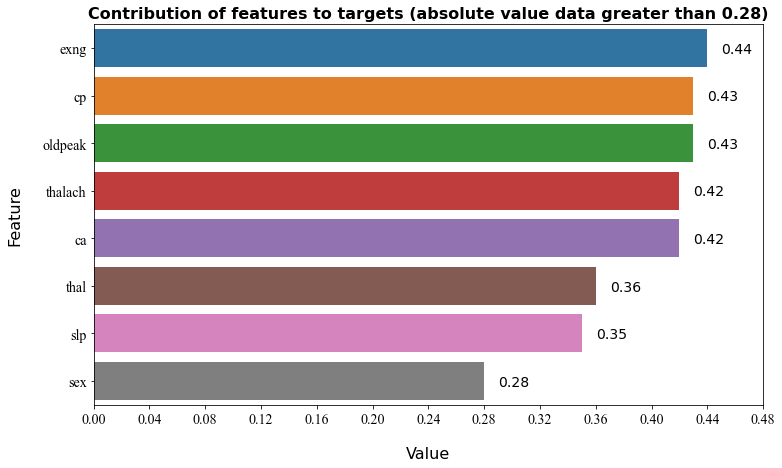

In [62]:
# Contribution of features to targets (absolute value data greater than 0.28)

models = pd.DataFrame({
    'Feature' : ['exng', 
                 'cp', 
                 'oldpeak', 
                 'thalach', 
                 'ca',
                 'thal', 
                 'slp', 
                 'sex'
                ],
    'Value' : [df_output_row2_abs_sort[0],
               df_output_row2_abs_sort[1],
               df_output_row2_abs_sort[2],
               df_output_row2_abs_sort[3],
               df_output_row2_abs_sort[4],
               df_output_row2_abs_sort[5],
               df_output_row2_abs_sort[6],
               df_output_row2_abs_sort[7]
              ]
})

plt.figure(figsize = (12, 7))
sns.barplot(x = 'Value', y = 'Feature', data = models)

plt.title('Contribution of features to targets (absolute value data greater than 0.28)',fontsize = 16, fontweight = 'bold', alpha = 1)

plt.xlabel('Value', fontsize = 16, labelpad=20)
plt.ylabel('Feature', fontsize = 16, labelpad=20)

my_x_ticks = np.arange(0.00, 0.52, 0.04)
plt.xticks(my_x_ticks)

plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.yticks(fontproperties = 'Times New Roman', size = 14)

plt.text(0.45, 0.10, '0.44', size = 14)
plt.text(0.44, 1.10, '0.43', size = 14)
plt.text(0.44, 2.10, '0.43', size = 14)
plt.text(0.43, 3.10, '0.42', size = 14)
plt.text(0.43, 4.10, '0.42', size = 14)
plt.text(0.37, 5.10, '0.36', size = 14)
plt.text(0.36, 6.10, '0.35', size = 14)
plt.text(0.29, 7.10, '0.28', size = 14)
    
plt.show()

Text(0, 0.5, '')

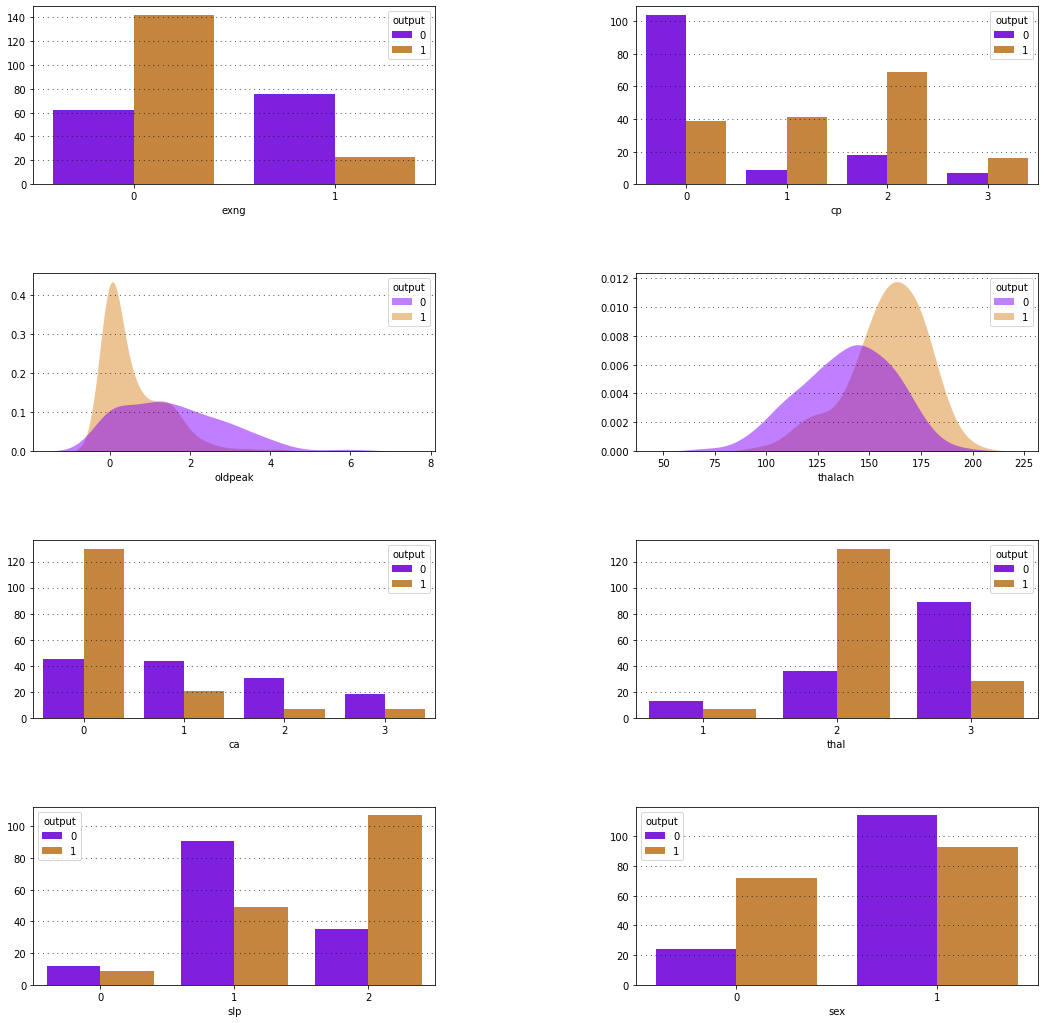

In [63]:
# The distribution relationship between the specified feature and the target

fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(4,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])


background_color = "#FFFFFF"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)

# Set title
#ax0.text(0.4, 170, 'exng', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set ordinate
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax0,data=df_origin,x='exng',palette=["#8000ff","#da8829"], hue='output')
#sns.kdeplot(ax=ax0, data=df_origin, x='exng',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax0.set_xlabel("exng")
ax0.set_ylabel("")

# Set title
#ax1.text(1.4, 125, 'cp', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set ordinate
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax1,data=df_origin,x='cp',palette=["#8000ff","#da8829"], hue='output')
# sns.kdeplot(ax=ax1, data=df_origin, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("cp")
ax1.set_ylabel("")

# Set title
#ax2.text(0.4, 0.01, 'oldpeak', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax2, data=df_origin, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax2.set_xlabel("oldpeak")
ax2.set_ylabel("")

# Set title
#ax3.text(1.4, 125, 'thalach', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df_origin, x='thalach',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("thalach")
ax3.set_ylabel("")

# Set title
# ax4.text(0.4, 235, 'ca', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set ordinate
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax4,data=df_origin,x='ca',palette=["#8000ff","#da8829"], hue='output')
#sns.kdeplot(ax=ax4, data=df_origin, x='ca',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax4.set_xlabel("ca")
ax4.set_ylabel("")

# Set title
# ax5.text(0.4, 235, 'thal', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set ordinate
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax5,data=df_origin,x='thal',palette=["#8000ff","#da8829"], hue='output')
#sns.kdeplot(ax=ax5, data=df_origin, x='thal',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("thal")
ax5.set_ylabel("")

# Set title
# ax6.text(0.4, 235, 'slp', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set ordinate
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax6,data=df_origin,x='slp',palette=["#8000ff","#da8829"], hue='output')
#sns.kdeplot(ax=ax6, data=df_origin, x='slp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax6.set_xlabel("slp")
ax6.set_ylabel("")

# Set title
# ax7.text(0.4, 235, 'sex', fontsize=20, fontweight='bold', fontfamily='Times New Roman', color="#000000")
# Set ordinate
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
# Set abscissa
sns.countplot(ax=ax7,data=df_origin,x='sex',palette=["#8000ff","#da8829"], hue='output')
#sns.kdeplot(ax=ax7, data=df_origin, x='sex',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("sex")
ax7.set_ylabel("")

### Feature selection result analysis
feature selection
The functions are:
1. Enhance the generalization ability of the model and reduce overfitting
The methods are:
1. Filtration method
2. Packaging method
The methods used in this project are:
Filtering removes variables below a specified threshold based on their correlation coefficients

## Conclusions from all the graphs and data analysis above

### 1.1 - Data preprocessing

1. There are no NaN values in the data.
2. There are no null values in the data.
3. There are certain outliers in all the continuous features.

### 2.1 - Single feature analysis

1. The gender distribution in the dataset is not even, with sex=0 data (female) being twice as likely as sex=1 data (male).
2. Age is mostly concentrated in 50-60 years old.
3. output (result) is almost evenly distributed.

### 3.1 - Correlation Matrix and Scatterplot heatmap analysis

1. The scatterplot heatmap matrix suggests that there is little correlation between continuous variables.
2. The scatterplot heatmap matrix suggests that three features have the most influence on the results:cp, thalachh and clp.

### 4.1 - Data distribution analysis

1. Age and sex did not intuitively affect results. Age and sex should not be used as the main criteria for judging whether a heart attack will occur.
2. The impact of thalachh on output is indeed great, and patients with maximum heart rate are more likely to have a heart attack.
3. Judging from the distribution of data, oldpeak also has a great impact on output, people with lower pevious peak achieved have higher chances of heart attack.
4. People with Non-Anginal chest pain (cp = 2) have higher chances of heart attack.
5. People with 0 major vessels (caa = 0) have high chance of heart attack. Therefore checking the Number of major vessels is a very effective method.
6. There is no decisive relationship between people's gender and output, but females (sex=1) are more likely to have heart attacks from the results.
7. People with thall = 2 (thalium stress test result) have much higher chance of heart attack. Therefore thalium stress test is also a very effective method.
8. People with no exercise induced angina (exng = 0) have higher chance of heart attack. From the results, there is no relationship between whether there is exercise angina pectoris and age.

